<div class="alert alert-block alert-info">
Singapore Management University<br>
CS105 Statistical Thinking for Data Science, 2024/25 Term 2
</div>

# CS105 Group Project Submission (Part I)

-----
Provide your team details, including section, team number, team members, and the name of the dataset. 
Complete all of the following sections. For any part requiring code to derive your answers, please create a code cell immediately below your response and run the code.
To edit any markdown cell, double click the cell; after editing, execute the markdown cell to collapse it.
<br>
-----

## Declaration

<span style="color:red">By submitting this notebook, we declare that **no part of this submission is generated by any AI tool**. We understand that AI-generated submissions will be considered as plagiarism, and just like other plagirisum cases, disciplinary actions will be imposed.</span>

#### Section: G1
#### Team: T3
#### Members: 
1. BRENDAN TAN YONG JIE, brendan.tan.2022
2. DYLAN MATTHEW TAN JUN, dylan.tan.2022
3. SAMYUKTHA PUGALANTHI, samyukthap.2022
4. LEE JIA HENG, jiaheng.lee.2023
5. LAU WEI BIN, weibin.lau.2024

#### Dataset: climate.csv

## Part I: Exploratory Data Analysis (EDA) [8% of final grade]

### 1. Overview of dataset [15% of Part I]

**a.** Summarise the background of the dataset [limited to 50 words]

**Response.** 

Climate.csv contains data about the chemical composition of the atmosphere over 25 years (May 1983 to Dec 2008). Each sample can be distinguished by the time taken (Year and Month), and consist of measurements of chemicals that might contribute to global warming, alongside the earth's temperature at the time.


**b.** State the size of the dataset

**Response.** 

The dataset contains 308 rows and 11 columns / features. This can also be obtained using the following code block:

In [179]:
#!pip install statsmodels matplotlib pandas numpy
# above for mosaic plot in qn 3
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

DATA_FILEPATH = "../A_data/climate.csv"
GRAPH_FILEPATH = "graphs/"

dataset = pd.read_csv(DATA_FILEPATH)
data_size = dataset.shape
print(f"The Dataset has a size of {data_size[0]} rows and {data_size[1]} columns/features, containing {data_size[0]*data_size[1]} entries.")

The Dataset has a size of 308 rows and 11 columns/features, containing 3388 entries.


**c.** For each variable, describe what it represents and its data type (numerical or categorical)

**Response.**

The Dataset has the following variables, as obtained by the table provided in the document `Data Readme 2025.pdf`.

  

| Name     | Description                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          | Type        |
| -------- | -------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- | ----------- |
| Year     | The year a specific observation was made                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             | Categorical |
| Month    | The month a specific observation was made                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            | Categorical |
| MEI      | Multivariate El Nino Southern Oscillation index (MEI). <br><br>A measure of the strength of the El Nino/La Nina-Southern Oscillation used by the [Physical Sciences Laboratory](https://psl.noaa.gov/enso/mei/#datacomp). This index is considered a predictor for weather phenomena, aggregated from time-series data over 5 environmental variables.                                                                                                                                                                                                                                                                                                                                                               | Numerical   |
| CO2      | Atmospheric concentration of carbon dioxide.<br><br>Measured in parts per million by volume, it acts as a greenhouse gas and absorbs heat radiating from the earth, and re-distributes it evenly in all directions. However, its atmospheric levels are also correlated to various other detrimental processes like ocean acidification.                                                                                                                                                                                                                                                                                                                                                                             | Numerical   |
| CH4      | Atmospheric concentration of methane. <br><br>Measured in parts per million by volume.<br><br>Mainly contributed by rearing livestock and the burning of fossil fuels, trash in landfills and biomass, Methane is a [28 times more potent](https://www.epa.gov/gmi/importance-methane#:~:text=Methane%20is%20more%20than%2028,trapping%20heat%20in%20the%20atmosphere.) greenhouse gas. However, it has a shorter lifespan than CO2 in the atmosphere due to chemical and bioexpical processes that break it down quickly.                                                                                                                                                                                           | Numerical   |
| N2O      | Level of atmospheric concentration of nitrous oxide.<br><br>Abstracted composition levels to “H” for “High” and “L” for Low.<br><br>It is considered a severe pollutant as well due to how it is a more potent chemical in trapping heat in the atmosphere and as a significant  contributor to acid rain, and can [last on average of 114 years in the atmosphere](https://insideclimatenews.org/news/11092019/nitrous-oxide-climate-pollutant-explainer-greenhouse-gas-agriculture-livestock/#:~:text=Like%20other%20greenhouse%20gases%2C%20nitrous,middle%20ground%20of%20super%20pollutants.).<br>                                                                                                              | Categorical |
| CFC-11   | Atmospheric concentration of trichlorofluoromethane. <br><br>Measured in parts per billion by volume.<br><br>It plays a role in the depletion of Ozone from our stratosphere, deteriorating its ability to prevent harmful levels of ultraviolet-B radiation from reaching the earth through the [chapman cycle](https://chem.libretexts.org/Bookshelves/Physical_and_Theoretical_Chemistry_Textbook_Maps/Supplemental_Modules_(Physical_and_Theoretical_Chemistry)/Kinetics/07%3A_Case_Studies-_Kinetics/7.03%3A_Depletion_of_the_Ozone_Layer#:~:text=The%20Chapman%20Cycle,-The%20stratosphere%20is&text=The%20ozone%20layer%20is%20created,O2%E2%86%922O.). It is considered a Class 1 Ozone-depleting substance. | Numerical   |
| CFC-12   | Atmospheric concentration of dichlorodifluoromethane. <br><br>Measured in parts per billion by volume.<br><br>Considered a Class 1 Ozone-depleting substance with a higher [global warming potential](https://www.epa.gov/ozone-layer-protection/ozone-depleting-substances#:~:text=(ODP)%2C%20Global%20Warming%20Potential,has%20a%20GWP%20of%205%2C000.).<br>                                                                                                                                                                                                                                                                                                                                                      | Numerical   |
| TSI      | Level of Total Solar Irradiance. TSI is the rate at which sun's energy is deposited per unit area. <br><br>Abstracted composition levels to “H” for “High”, “M” for “medium” and “L” for Low.<br><br>Used as an indication of ozone depletion, which theoretically results in an increase in the amount of radiation reaching the earth’s surface.                                                                                                                                                                                                                                                                                                                                                                   | Categorical |
| Aerosols | Level of stratospheric "aerosol optical depth" at 550nm. This is linked to volcanoes, as eruptions result in new particles added to atmosphere. <br><br>Abstracted composition levels to “H” for “High”, “M” for “medium” and “L” for Low.<br><br>AOD tells us how much direct sunlight is prevented from reaching the ground by these aerosol particles (Source: [NOAA Global Monitoring Laboratory](https://gml.noaa.gov/grad/surfrad/aod/#:~:text=Aerosol%20optical%20depth%20is%20a,ground%20by%20these%20aerosol%20particles.)).<br>                                                                                                                                                                            | Categorical |
| Temp     | Difference in temperature between average global temperature and a reference value.<br>                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              | Numerical   |


### 2. Data pre-processing [35% of Part I]

**a.** For each variable, determine the percentage of missing data. For any column with missing data, describe how you resolve the issue. Clearly state any assumption you made.

**Response.** 

In [180]:
# import relevant modules
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

Prescribed method: ratio of rows returned from `.count()`

In [181]:
total_number_of_rows = dataset.shape[0]

has_null = round(dataset.count() / total_number_of_rows,2) != 1 #condition assigned to variable
dataset_empty_columns = dataset.columns[has_null]

# get rows with empty datasets
dataset_empty_row_freq = total_number_of_rows - dataset.count()
# remove rows with no missing values
dataset_empty_row_freq = dataset_empty_row_freq[dataset_empty_row_freq > 0]


if (missing_cells := sum(dataset_empty_row_freq)) :

    print("The columns with missing values are:", ", ".join("\"" + i + "\"" for i in dataset_empty_columns))

    print()
    print("Preview of dataframe [column name, rows with missing data for that column]:")

    print(dataset_empty_row_freq)
    print()
    
    percentage_missing_data = (missing_cells / (total_number_of_rows * dataset.shape[1])) * 100
    print(f"Total number of missing cells: {missing_cells}, and {round(percentage_missing_data,3)}% of the data is missing.")

else:
    print("There are no missing values in the dataset.")

The columns with missing values are: "Month", "Aerosols"

Preview of dataframe [column name, rows with missing data for that column]:
Month       14
Aerosols    13
dtype: int64

Total number of missing cells: 27, and 0.797% of the data is missing.


| Column with Missing Data   | Solution |
| -------- | ------- |
| Month    | Since the data has already been pre-sorted in ascending order on the columns of {year,month}, we can just check the previous row's month and year, and set the month to be the next one after (ie previous row was May 2000, Missing data will be Apr 2000)|\
| Aerosols | based on the existing data, there seems only be a strong association between the CFC composition (meaning both CFC-11 and CFC-12) and the label for each category, not a strict correlation (likely due to additional factors like other aerosols being considered in the categorical labelling such as smoke, dust, and a more precise measure of NO2.) To fill up the data, we could opt to look at the composition of CFCs in the rows before and after, compute the harmonic mean and see which value it is closer to (ie month prior has label M, month after has label L, compute and compare harmonic means to calculate which is closer). Alternatively, we could obtain more data or perform association rule mining. As a last resort, we could just drop the rows with missing data in that column.|

Assumptions made: <br>
- The data is already organised in ascending order with respect to the columns ["Year","Month"].
- A sample is obtained every month, and at the same time.
<!--- The categorical column "Aerosols" is solely based on the amounts of CFC 11 and 12 in the atmosphere in the same sample.-->


Rows with missing values: (saved under variable `rows_with_missing_values`)

In [182]:
global_isnull = dataset.isna() == True
rows_with_missing_values = dataset[global_isnull.any(axis=1)]
# axis=1 for returning rows, axis=0 for columns
print(rows_with_missing_values.head())

    Year  Month    MEI     CO2      CH4 N2O   CFC-11   CFC-12 TSI Aerosols  \
12  1984    5.0  0.121  347.55  1649.33   L  199.233  366.317   M      NaN   
21  1985    NaN -0.602  346.06  1666.21   H  209.543  374.681   L      NaN   
25  1985    6.0 -0.086  348.40  1659.40   L  212.512  381.642   L      NaN   
36  1986    5.0  0.305  352.54  1686.02   L  222.197  400.393   L      NaN   
48  1987    NaN  2.122  352.14  1694.75   L  232.939  418.723   M        M   

     Temp  
12  0.065  
21 -0.155  
25 -0.049  
36  0.023  
48  0.145  


Fix Month: Refer to previous column, fill accordingly

In [183]:
month_save = dataset.copy() # toggle to test month filler
check_isna = month_save.isna() == True
check_rows_with_missing_values = month_save[check_isna.any(axis=1)]

for current_index,row in check_rows_with_missing_values.iterrows():
    #get previous index's year and month
    next_index = current_index + 1
    next_month = month_save.loc[next_index, 'Month']
    current_month = (next_month - 1) if (next_month <= 11 and next_month >= 2) else 1.0
    month_save.iloc[current_index, month_save.columns.get_loc('Month')] = current_month

# find all rows that had missing values in the original set
dataset_fixed_months = month_save[check_isna.any(axis=1)]
print(dataset_fixed_months.head(20))

     Year  Month    MEI     CO2      CH4 N2O   CFC-11   CFC-12 TSI Aerosols  \
12   1984    5.0  0.121  347.55  1649.33   L  199.233  366.317   M      NaN   
21   1985    2.0 -0.602  346.06  1666.21   H  209.543  374.681   L      NaN   
25   1985    6.0 -0.086  348.40  1659.40   L  212.512  381.642   L      NaN   
36   1986    5.0  0.305  352.54  1686.02   L  222.197  400.393   L      NaN   
48   1987    5.0  2.122  352.14  1694.75   L  232.939  418.723   M        M   
54   1987    1.0  1.253  347.96  1716.57   H  239.588  433.915   M        M   
63   1988    8.0 -1.374  350.66  1691.77   L  248.187  449.005   M        M   
99   1991    8.0  1.012  353.89  1721.95   L  266.540  493.929   M        H   
103  1991    1.0  1.320  355.07  1752.37   L  266.059  498.083   M      NaN   
106  1992    1.0  1.992  357.82  1752.39   L  268.477  502.436   H        H   
107  1992    4.0  2.271  359.00  1753.24   L  268.387  502.811   H        H   
138  1994    1.0  1.278  357.56  1781.02   L  271.08

Fix aerosol category (drop missing data since no strong correlation is observable)

In [184]:
Aerosol_missing_values = month_save[month_save['Aerosols'].isna()==True]
print("Aerosol_missing_values:")
print(Aerosol_missing_values)

dataset_full_clean = month_save.dropna(inplace=False)
print('Check for empty rows:')
print()
print(dataset_full_clean.count())
print()
print(f"Dataset has {dataset_full_clean.shape[0]} rows and {dataset_full_clean.shape[1]} columns after cleaning.")
print()
print("Dataset preview:")
print(dataset_full_clean.head())

Aerosol_missing_values:
     Year  Month    MEI     CO2      CH4 N2O   CFC-11   CFC-12 TSI Aerosols  \
12   1984    5.0  0.121  347.55  1649.33   L  199.233  366.317   M      NaN   
21   1985    2.0 -0.602  346.06  1666.21   H  209.543  374.681   L      NaN   
25   1985    6.0 -0.086  348.40  1659.40   L  212.512  381.642   L      NaN   
36   1986    5.0  0.305  352.54  1686.02   L  222.197  400.393   L      NaN   
103  1991    1.0  1.320  355.07  1752.37   L  266.059  498.083   M      NaN   
138  1994    1.0  1.278  357.56  1781.02   L  271.087  520.879   M      NaN   
143  1995    4.0  0.419  363.23  1762.72   L  269.861  523.229   L      NaN   
165  1997    2.0 -0.607  364.09  1768.98   L  268.491  532.387   L      NaN   
167  1997    4.0  0.493  382.10  1780.96   L  268.151  532.257   L      NaN   
210  2000    1.0 -0.755  368.33  1799.06   L  262.448  542.379   H      NaN   
216  2001    5.0  0.185  373.82  1783.63   L  261.019  542.003   H      NaN   
257  2004   10.0  0.467  374

---

**b.** For each variable, identify outliers (if any) and describe how you resolve the issue. Clearly state any assumption you made.

**Response.** 

review all columns with numerical data

In [185]:
num_float64_columns = dataset.select_dtypes(include=['float64'])
print(f"Number of columns with dtype float64 (total: {num_float64_columns.shape[1]}):")
print('\t\n'.join(num_float64_columns))

Number of columns with dtype float64 (total: 7):
Month	
MEI	
CO2	
CH4	
CFC-11	
CFC-12	
Temp


Following prescribed outlier extraction method: observe outlier values, defined as values outside of interquartile ranges for each individual column

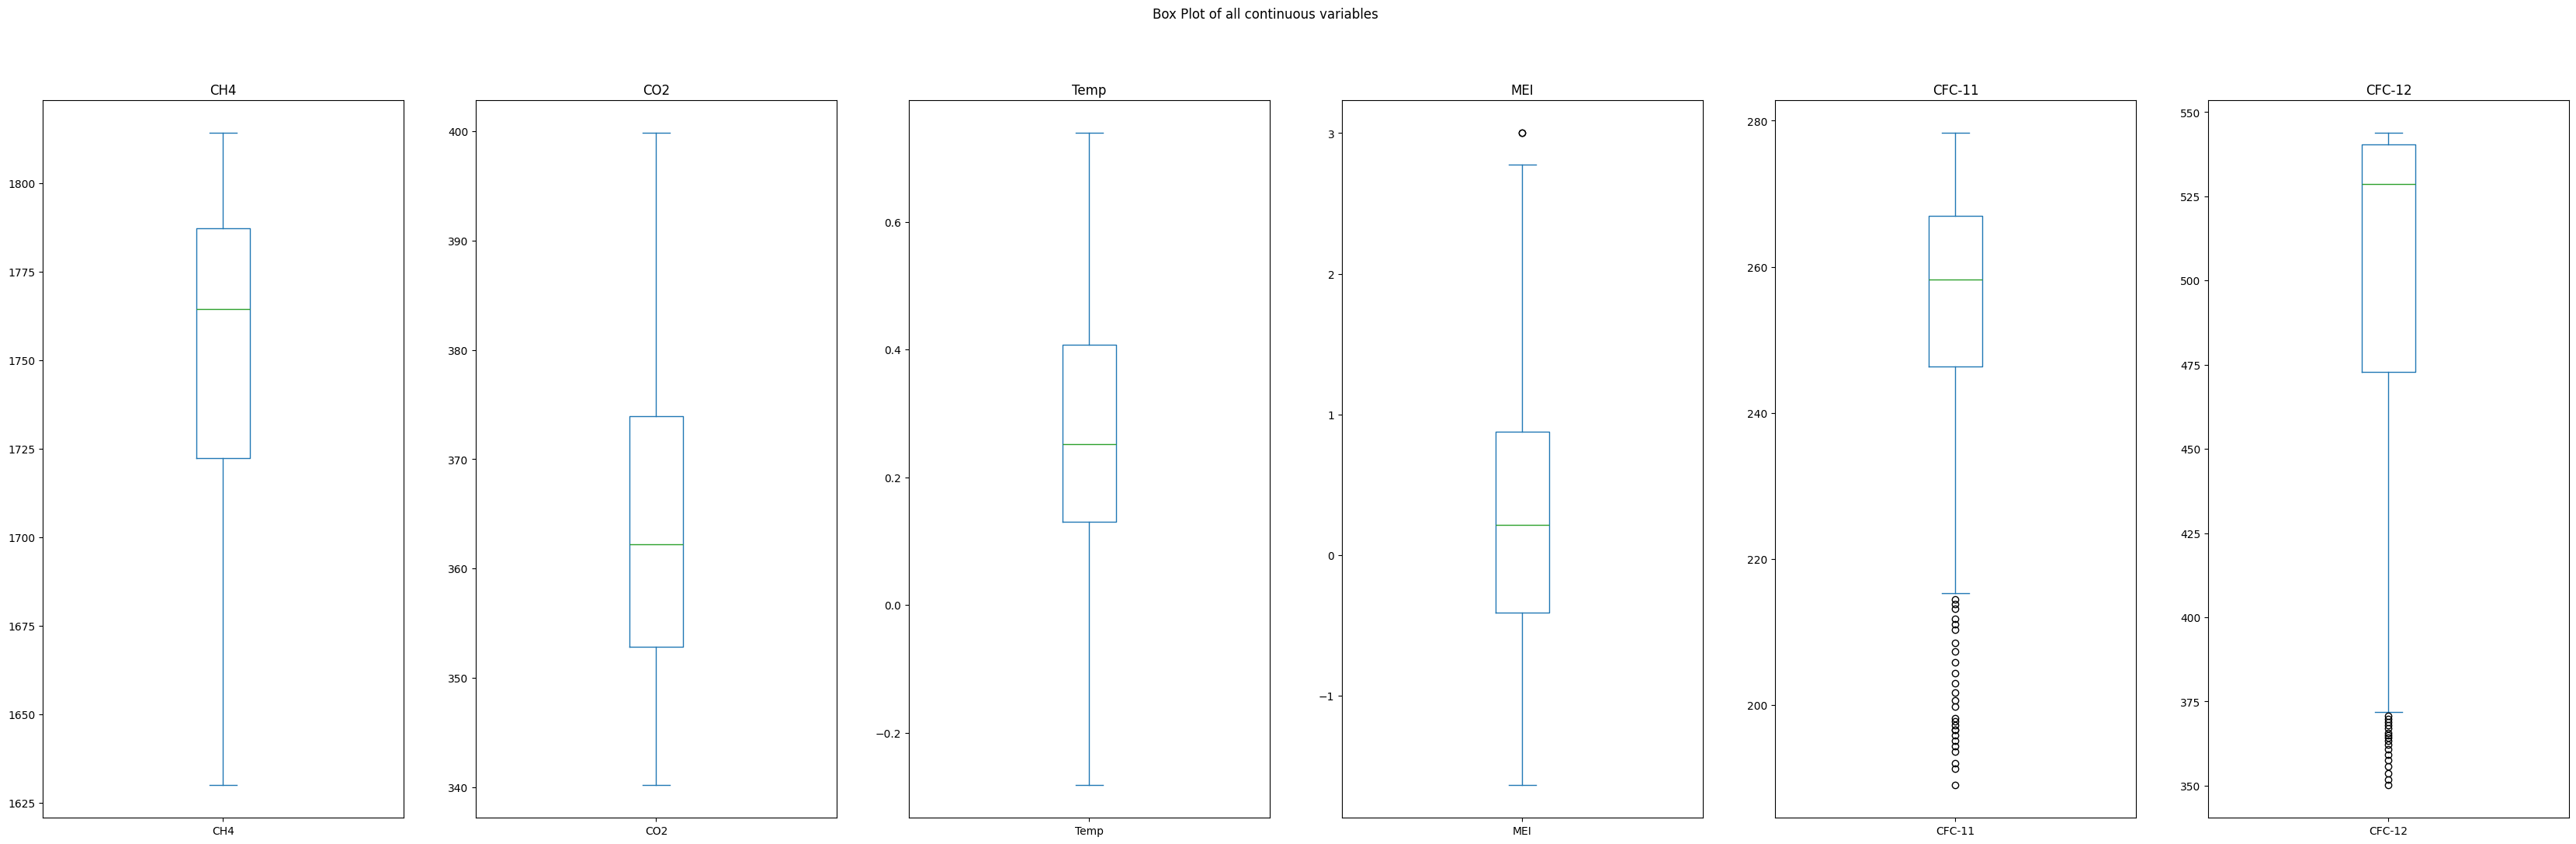

In [222]:
#dataset.dtypes
num_float64_columns = dataset.select_dtypes(include=['float64']).shape[1]
cols = list(dataset.select_dtypes(include=['float64']))
#CHANGE HERE
excluded_cols = {'Month'}

plottable_columns = list(set(cols) - excluded_cols)

#fig, axes = plt.subplots(num_float64_columns,1, sharex=True, sharey=True, layout="constrained")
fig, axes = plt.subplots(1,len(plottable_columns),figsize = (len(plottable_columns) * 7,12))
#plt.figure(figsize=(200, 250))
for i in range(len(plottable_columns)):
    
    column_name = plottable_columns[i]
    if column_name not in excluded_cols:
        # for line plot to properly view trend
        #dataset_full_clean[column_name].plot(ax=axes[i],kind='line')
        
        # for following prescribed means for cleaning
        dataset_full_clean[column_name].plot(ax=axes[i],kind='box')
        
        axes[i].set_title(column_name)
plt.suptitle("Box Plot of all continuous variables")
plt.savefig(GRAPH_FILEPATH+'2b_intial_outlier_analysis_box_plot.png')
plt.show()

Based on visual observation of the box plots of the samples in the dataset over each of the columns with numerical datatypes, there are outliers present in the columns `CFC-11`, `MEI` and `CFC-12`, where these samples have values that exceed 1.5 times the interquartile range. The columns with apparent outliers are elaborated on with the table below:

|Column with Outliers|Justifications|
|---|---|
| `CFC-11` | There are 26 samples that are considered outliers. However, the associated data may not be true outliers as they also form a large proportion of the data, comprising of almost 8.81%% of the data. In addition, plotting this data against the column `Time`, provides a strong non-linear correlation (using visual observation), thus indicating that the outliers flagged may be inappropriate. Hence, no outliers should be removed from this data. |
| `CFC-12` |  There are 6 samples that are considered as outliers (2.03% of the data). Furthermore, these outliers are also clearly visible when plotting this data against `Time` despite the data having a non-linear relationship, since their values are a lot lower than the samples taken before and after them. This would be possible by sorting the datset on the `CFC-12` column and removing the 5 smallest values. Alternatively, given the graph, we can set a threshold to exclude samples with `CFC-12` values that are less than 300.  |
| `MEI` | There are 3 samples that are considered outliers (1.02 % of the data). However, the associated data may not be considered outliers as there seems to be no apparent trend that MEI has with the other columns with continuous data, thus we cannot definitively say that the outliers do not contribute to any trend and thus we will not remove these outliers.  |  
  
Assumptions made:  
- the data under 'CFC-11' has a known, definite and non-linear correlation with 'Temp'.
- there is a weak correlation for the outlier samples observed in columns `CFC-12` and `MEI` with the rest of the columns.

Created  `get_outliers` with function that assigns outlier sample references to dataframe under another variable

In [187]:
def get_outliers(Dataframe, column_name):
    Q1 = Dataframe[column_name].quantile(0.25)
    Q3 = Dataframe[column_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return Dataframe[(Dataframe[column_name] < lower_bound) | (Dataframe[column_name] > upper_bound)]

CFC_11_outliers = get_outliers(dataset_full_clean, 'CFC-11')
print("Number of outliers for column 'CFC-11':",CFC_11_outliers.shape[0])
print("proportion of data that is an outlier:",round(CFC_11_outliers.shape[0]/dataset_full_clean.shape[0]*100,2),'%')

CFC_12_outliers = get_outliers(dataset_full_clean, 'CFC-12')
print("Number of outliers for column 'CFC-12':",CFC_12_outliers.shape[0])
print("proportion of data that is an outlier:",round(CFC_12_outliers.shape[0]/dataset_full_clean.shape[0]*100,2),'%')

MEI_outliers = get_outliers(dataset_full_clean, 'MEI')
print("Number of outliers for column 'MEI':",MEI_outliers.shape[0])
print("proportion of data that is an outlier:",round(MEI_outliers.shape[0]/dataset_full_clean.shape[0]*100,2),'%')


Number of outliers for column 'CFC-11': 26
proportion of data that is an outlier: 8.81 %
Number of outliers for column 'CFC-12': 6
proportion of data that is an outlier: 2.03 %
Number of outliers for column 'MEI': 3
proportion of data that is an outlier: 1.02 %


Visual analysis that `CFC-11` data to check for outliers

CFC-11 Summary statistics
count    295.000000
mean     493.173807
std       65.306285
min      257.574000
25%      463.462000
50%      528.077000
75%      540.155500
max      543.813000
Name: CFC-12, dtype: float64


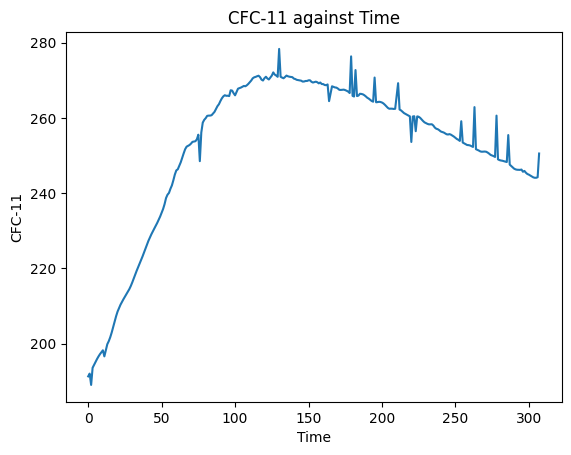

In [188]:
dataset_full_clean['CFC-11'].plot(kind='line',title='CFC-11 against Time',xlabel = 'Time',ylabel="CFC-11")
plt.savefig(GRAPH_FILEPATH+'2bi_CFC-11_against_time.png')
print('CFC-11 Summary statistics')
print(dataset_full_clean['CFC-12'].describe())

verify that CFC-11 sample outliers are reasonable, by plotting linear trends separately (split threshold at sample)

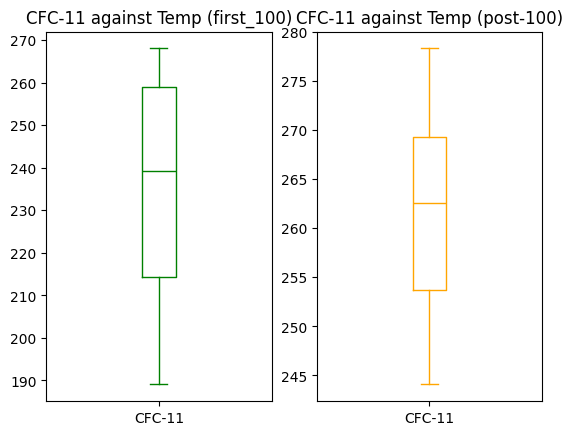

In [189]:
first_100 = dataset_full_clean[:100]
last_100 = dataset_full_clean[101:]

#for viewing the split point
#first_100['CFC-11'].plot(kind='line',title='CFC-11 against Temp',color='green')
#last_100['CFC-11'].plot(kind='line',title='CFC-11 against Temp',color='orange')

# for viewing the boxplots and justifying that outliers are only due to nonlinear curve
fig, axes = plt.subplots(nrows=1, ncols=2)

first_100['CFC-11'].plot(kind='box',title='CFC-11 against Temp (first_100)',ax=axes[0],color='green')
last_100['CFC-11'].plot(kind='box',title='CFC-11 against Temp (post-100)',ax=axes[1],color='orange')

plt.savefig(GRAPH_FILEPATH+'2bi_CFC-11_outlier_analysis_box_plot.png')
plt.show()
# box plots indicate no outliers, thus outliers from initial boxplot are justified.

Verify hypothesis by observing split graph

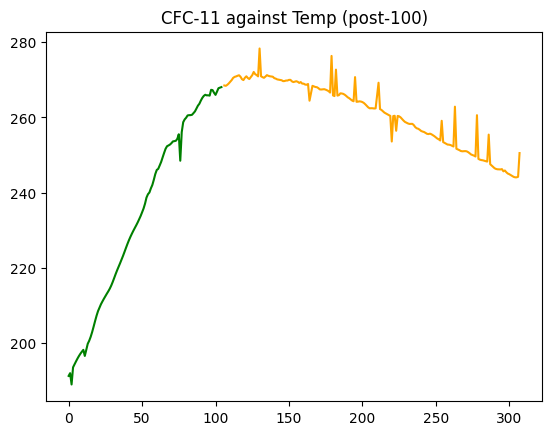

In [190]:
first_100['CFC-11'].plot(kind='line',title='CFC-11 against Temp (first_100)',color='green')
last_100['CFC-11'].plot(kind='line',title='CFC-11 against Temp (post-100)',color='orange')

plt.savefig(GRAPH_FILEPATH+'2bi_CFC-11_outlier_analysis_line_graph.png')
plt.show()

Visual analysis that `CFC-12` data to check for outliers

     Year  Month    MEI     CO2      CH4 N2O   CFC-11   CFC-12 TSI Aerosols  \
73   1989    6.0 -0.273  355.30  1713.80   L  253.793  263.793   M        M   
114  1992   11.0  0.602  354.27  1755.29   L  270.886  280.886   M        H   
132  1994    5.0  0.521  361.68  1755.04   L  270.691  280.691   M        H   
133  1994    6.0  0.734  360.80  1746.61   L  270.516  280.516   M        M   
227  2002    4.0  0.339  375.00  1782.47   L  259.574  269.574   H        L   
287  2007    4.0 -0.049  386.40  1802.11   L  247.574  257.574   L        M   

      Temp  
73   0.094  
114 -0.097  
132  0.218  
133  0.191  
227  0.443  
287  0.466  


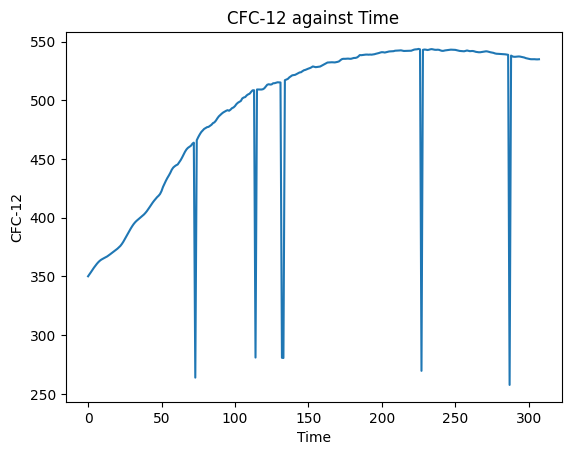

In [191]:
dataset_full_clean['CFC-12'].plot(kind='line',title='CFC-12 against Time',xlabel='Time',ylabel='CFC-12')

CFC_12_outliers = dataset_full_clean[dataset_full_clean['CFC-12']<300]
print(CFC_12_outliers)

plt.savefig(GRAPH_FILEPATH+'2bii_CFC-12_outlier_analysis_line_graph.png')
plt.show()


Hence, these 6 outliers should be removed since they deviate greatly from their adjacent values.

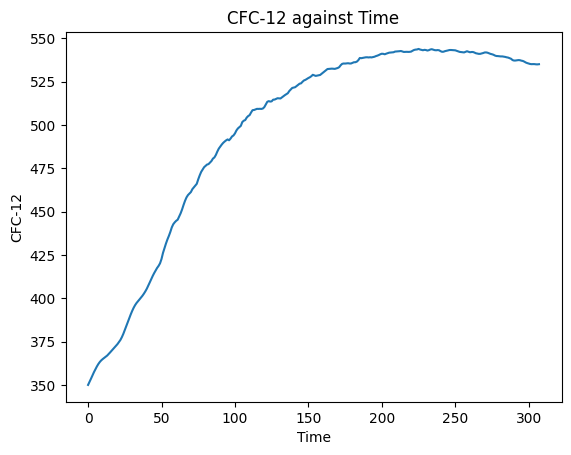

In [192]:
CFC_12_outliers_removed = dataset_full_clean[dataset_full_clean['CFC-12']>=300]
CFC_12_outliers_removed['CFC-12'].plot(kind='line',title='CFC-12 against Time',xlabel='Time',ylabel='CFC-12')

plt.savefig(GRAPH_FILEPATH+'2bii_CFC-12_outlier_analysis_line_graph_fixed.png')
plt.show()

dataset_full_clean = CFC_12_outliers_removed.copy()

Visualising `MEI` data based on samples over time

MEI Outliers:
     Year  Month    MEI     CO2      CH4 N2O   CFC-11   CFC-12 TSI Aerosols  \
171  1997    8.0  3.001  362.20  1750.23   L  267.441  533.315   M        M   
172  1997    9.0  3.000  360.31  1775.56   L  267.414  534.415   L        M   
177  1998    2.0  2.777  365.98  1766.01   L  266.978  535.561   M        L   

      Temp  
171  0.406  
172  0.457  
177  0.739  


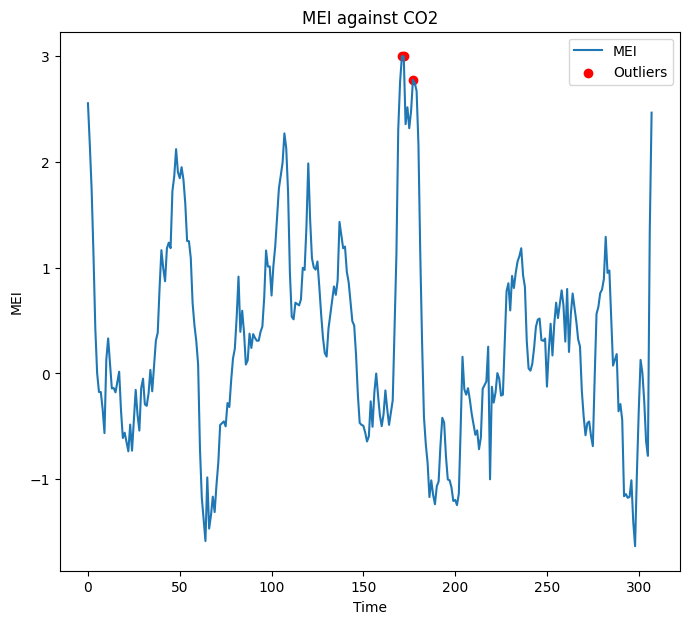

In [232]:
print("MEI Outliers:")
print(MEI_outliers)

dataset_full_clean['MEI'].plot(kind='line',title='MEI against CO2',xlabel='Time',ylabel='MEI',figsize=(8,7))
plt.scatter(MEI_outliers.index, MEI_outliers['MEI'], color='red')
plt.legend(['MEI','Outliers'],loc='best')
plt.savefig(GRAPH_FILEPATH+'2biii_MEI_outlier_analysis_line_graph.png')
plt.show()

No observable trend was present to indicate that outliers should be removed on the basis of deviation from time sampled, hence outlier samples flagged under `MEI` should be retained.

**c.** For categorical variables, perform the necessary encoding.

Performing One-hot encoding with non-numerical data columns

In [194]:
# performing categorical encoding over non-numeric columns
# storing final dataset under variable "dataset_clean_encoded"

dataset_clean_encoded = dataset_full_clean.copy()

all_cols = dataset_full_clean.columns
num_cols = list(dataset.select_dtypes(include=['float64']))
excluded_cols = {'Month','Year'}

categorical_cols = list(set(all_cols)-set(num_cols)-excluded_cols)
print('variables with categorical data:')
print(', '.join(categorical_cols))

for colname in categorical_cols:
    dummy = pd.get_dummies(dataset_clean_encoded[colname],prefix = f"{colname}")
    dataset_clean_encoded = pd.concat([dataset_clean_encoded,dummy], axis=1)

#show processed data
#dataset_clean_encoded.head()

variables with categorical data:
TSI, N2O, Aerosols


<!--**Response.** -->

### 3.	Exploratory analysis and visualization [50% of Part I]

**a.** For each variable, provide relevant summary statistics

**Response.** 

##### Univariate Analysis for Categorical Variables (`Aerosols`, `N2O`, `TSI`) 

Generating Relevant statistics for categorical data

In [195]:
cat_cols = ['TSI','N2O','Aerosols']
cat_rows = ['Low','Medium','High']
cat_enums = ['L','M','H']
cat_dict = dict(zip(cat_enums,cat_rows))
#print(cat_dict)

cat_col_modes = dataset_clean_encoded[cat_cols].mode()
for col in cat_cols:
    col_mode = cat_col_modes[col][0]
    print(F"Mode for column {col}: {col_mode}")
    print()
    
# data is also saved under variable `cat_col_modes`
print("Summary of modes for various columns:")
print()
print(cat_col_modes)

Mode for column TSI: M

Mode for column N2O: L

Mode for column Aerosols: M

Summary of modes for various columns:

  TSI N2O Aerosols
0   M   L        M


In [196]:
cat_col_freqs = dataset_clean_encoded[cat_cols].value_counts()
cat_col_freqs.sort_values()

#cat_col_freqs
# ASK LATER FOR HELP: 
# WHY THE FUCK ARE THERE SAMPLES WITH ONLY AEROSOL LEVELS DOES THAT MEAN THEY HAVE MISSING DATA
# I ALR FILTERED IT OUT WTF AND WHE I DID THAT ONE-LINER ABOVE IT DONT SAY SHITS MISSING WHERE TF IS THIS ELUSIVE AF VALUE
# SOLUTION: ASK GRP MEMS EXPORT CSV AND MANUALLY SCROLL TO FIND OR USE EXCEL OR SOME SHIT


TSI  N2O  Aerosols
M    H    H            1
          M            1
L    H    M            1
H    H    M            2
M    H    L            2
L    L    H            6
H    L    H            6
L    L    L            9
H    L    M           17
          L           25
M    L    H           37
          M           45
L    L    M           68
M    L    L           69
Name: count, dtype: int64

In [197]:
# obtaining frequency of each category for all categorical columns in the dataset
# sorting table columns manually
cat_rows_sort = ['2_High','0_Low','1_Medium']

TSI_freq = dataset_clean_encoded['TSI'].value_counts().sort_values()
N2O_freq = dataset_clean_encoded['N2O'].value_counts()
SOL_freq = dataset_clean_encoded['Aerosols'].value_counts()
# ASK LATER FOR HELP: 
# I swear theres a better way to do this its just cuz i got this one fucking row that has missing data

cat_freq = pd.concat([TSI_freq,N2O_freq,SOL_freq],axis=1).copy()
cat_freq.columns = cat_cols

# sorting the index without using methods
cat_freq.index = cat_rows_sort
cat_freq.sort_index(inplace=True)
cat_freq.index = cat_rows
print(cat_freq)

        TSI    N2O  Aerosols
Low      84  282.0       105
Medium  155    NaN       134
High     50    7.0        50


##### Proving that samples are unique and taken monthly

In [211]:
unique_count = dataset_clean_encoded.groupby('Year')['Month'].count()
print(f"Total number of samples (by calculation using value_counts method on 'months' column, on dataset grouped by year): {unique_count.sum()}")
print(
    "Number of entries checks out because:\n", dataset.shape[0], 
    "rows from original dataset -",
    int(Aerosol_missing_values.shape[0]),
    "rows from missing aerosol data -",
    int(CFC_12_outliers.shape[0]),
    "rows from CFC outliers removed",
    f"\n = {int(dataset_full_clean.shape[0])} rows in cleaned dataset")

Total number of samples (by calculation using value_counts method on 'months' column, on dataset grouped by year): 289
Number of entries checks out because:
 308 rows from original dataset - 13 rows from missing aerosol data - 6 rows from CFC outliers removed 
 = 289 rows in cleaned dataset


Thus, we can use the values from columns (`Year`,`Month`) as unique identifiers for each sample.

##### Univariate Analysis for Continuous Variables ( `Month`, `MEI`, `CO2`, `CH4`, `CFC-11`, `CFC-12`, `Temp` ) 

Generating relevant summary statistics from in-built method `.describe()`

In [ ]:
dataset_clean_encoded.describe()

,Year,Month,MEI,CO2,CH4,CFC-11,CFC-12,Temp
count,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000
mean,1995.716263,6.418685,0.288073,363.459689,1749.927474,252.136557,497.762073,0.260775
std,7.452333,3.516992,0.965536,13.090787,45.941191,20.228068,57.561610,0.177587
min,1983.000000,1.000000,-1.635000,340.170000,1629.890000,189.051000,350.113000,-0.282000
25%,1989.000000,3.000000,-0.407000,352.840000,1722.260000,246.307000,472.912000,0.130000
50%,1996.000000,7.000000,0.216000,362.180000,1764.330000,258.289000,528.589000,0.252000
75%,2002.000000,9.000000,0.880000,373.930000,1787.320000,266.978000,540.456000,0.408000
max,2008.000000,12.000000,3.001000,399.850000,1814.180000,278.311000,543.813000,0.739000


**b.** For each variable, provide an appropriate visualisation depicting the distribution of its values, and summarize any key observation(s) you made.

**Response.** 

<h5> Visualizations for Continuous Data

Boxplots for continuous data

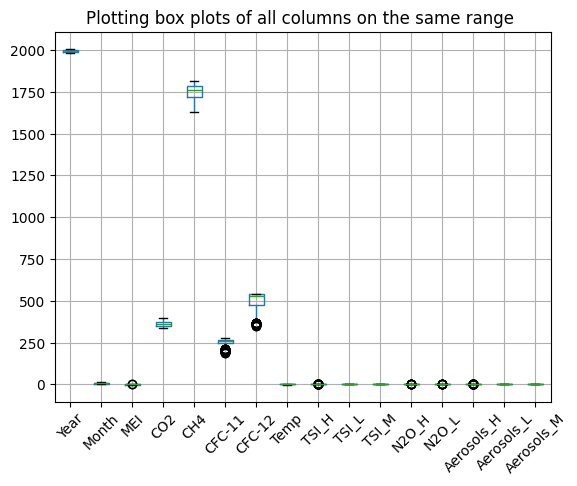

In [233]:
dataset_clean_encoded.boxplot()
plt.xticks(rotation = 45)
plt.title("Plotting box plots of all columns on the same range ")
plt.savefig(GRAPH_FILEPATH + '3b_global_box_plot.png')
plt.show()

Alternative representation: boxplots on different subplots

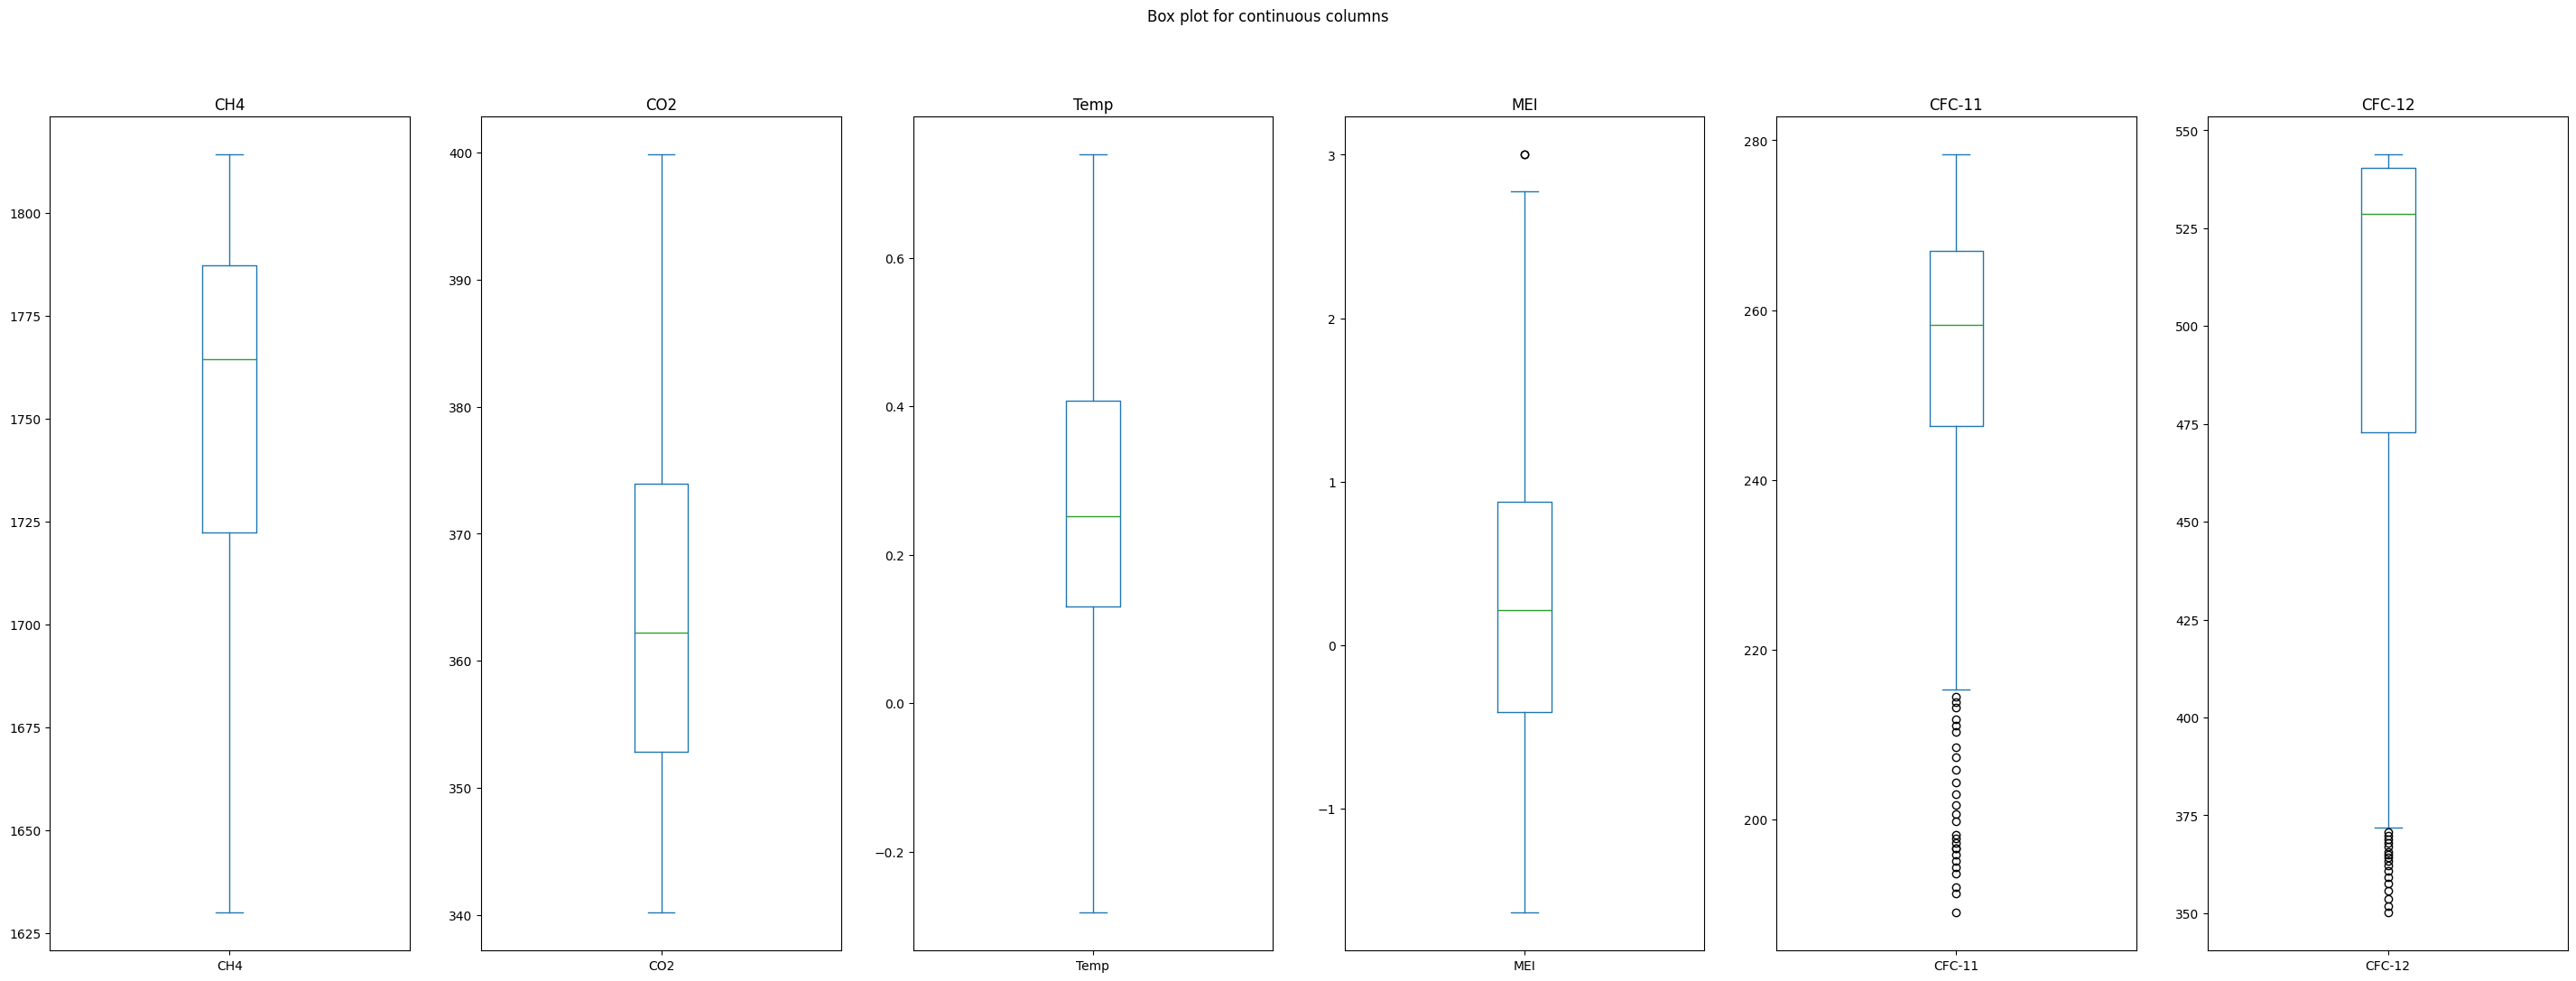

In [234]:
#dataset.dtypes
num_float64_columns = dataset.select_dtypes(include=['float64']).shape[1]
cols = list(dataset.select_dtypes(include=['float64']))
#CHANGE HERE
excluded_cols = {'Month'}

plottable_columns = list(set(cols) - excluded_cols)

#fig, axes = plt.subplots(num_float64_columns,1, sharex=True, sharey=True, layout="constrained")
fig, axes = plt.subplots(1,len(plottable_columns),figsize = (len(plottable_columns) * 6,12))
#plt.figure(figsize=(200, 250))
for i in range(len(plottable_columns)):
    
    column_name = plottable_columns[i]
    if column_name not in excluded_cols:
        # for line plot to properly view trend
        #dataset_full_clean[column_name].plot(ax=axes[i],kind='line')
        
        # for following prescribed means for cleaning
        dataset_full_clean[column_name].plot(ax=axes[i],kind='box')
        
        axes[i].set_title(column_name)

plt.suptitle("Box plot for continuous columns")
plt.savefig(GRAPH_FILEPATH + '3b_continuous_variable_box_plot.png')
plt.show()

Histograms for Continuous data

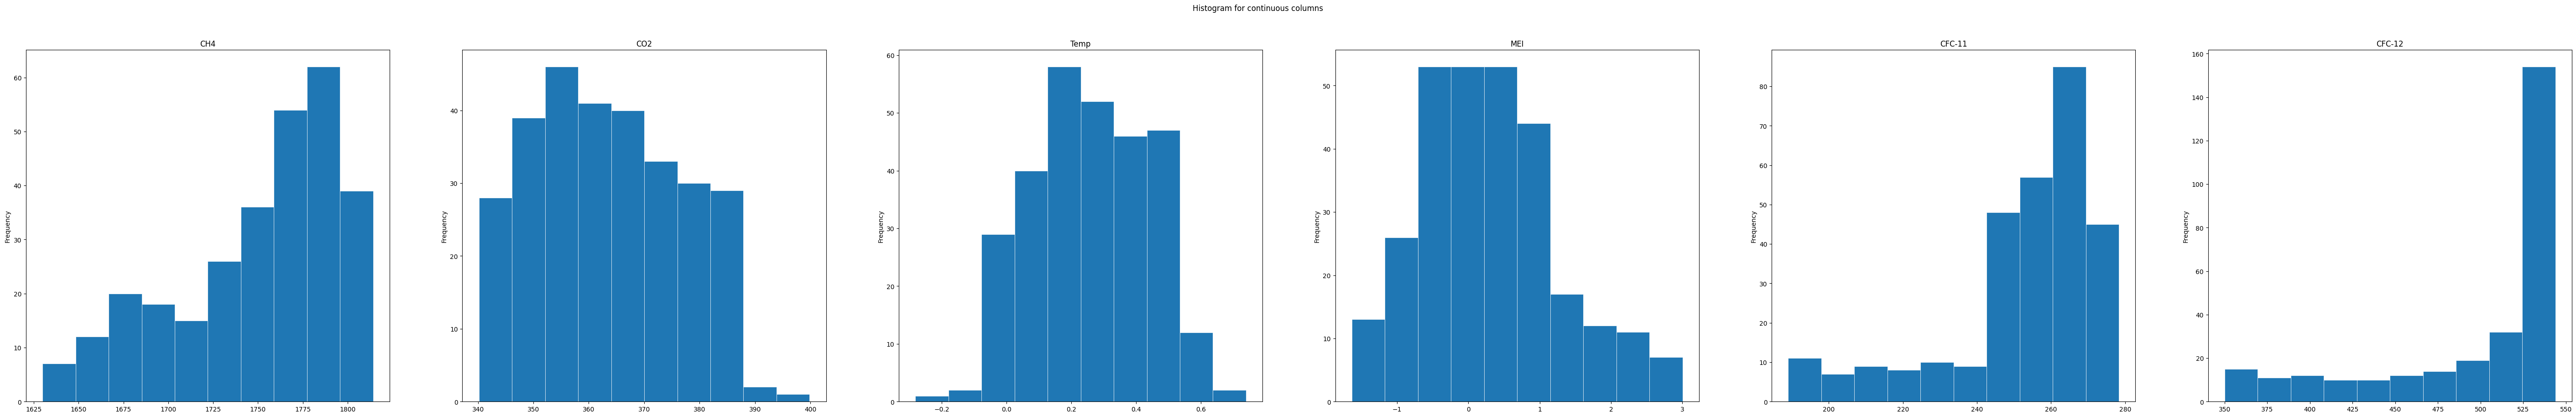

In [239]:
#dataset.dtypes
num_float64_columns = dataset.select_dtypes(include=['float64']).shape[1]
cols = list(dataset.select_dtypes(include=['float64']))
#CHANGE HERE
excluded_cols = {'Month'}

plottable_columns = list(set(cols) - excluded_cols)

#fig, axes = plt.subplots(num_float64_columns,1, sharex=True, sharey=True, layout="constrained")
fig, axes = plt.subplots(1,len(plottable_columns),figsize = (len(plottable_columns) * 12,10))
#plt.figure(figsize=(200, 250))
for i in range(len(plottable_columns)):
    
    column_name = plottable_columns[i]
    if column_name not in excluded_cols:
        # for line plot to properly view trend
        #dataset_full_clean[column_name].plot(ax=axes[i],kind='line')
        
        # for following prescribed means for cleaning
        dataset_full_clean[column_name].plot(ax=axes[i],kind='hist',bins=10,linewidth=0.5, edgecolor="white")        
        axes[i].set_title(column_name)

plt.suptitle("Histogram for continuous columns")
plt.savefig(GRAPH_FILEPATH + '3b_continuous_variable_histogram.png')
plt.show()

Visualise histogram for distribution of categorical values

            Low  Medium  High
TSI        84.0   155.0  50.0
N2O       282.0     NaN   7.0
Aerosols  105.0   134.0  50.0


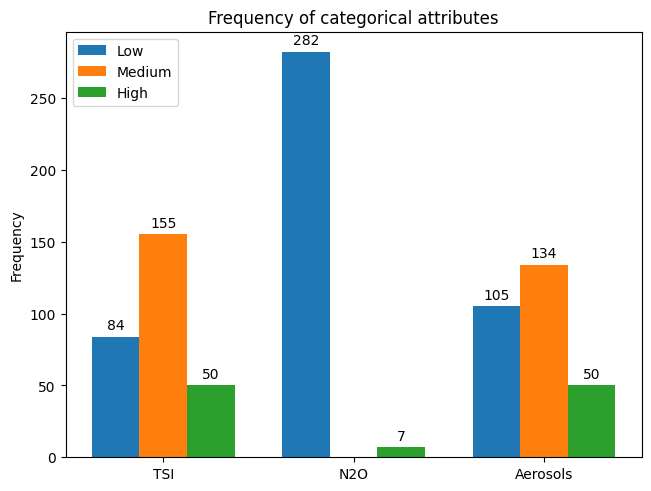

In [240]:
x = np.arange(len(cat_cols))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

cat_freq_plot = cat_freq.transpose()
print(cat_freq_plot)
fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in cat_freq_plot.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Frequency')
ax.set_title('Frequency of categorical attributes')
ax.set_xticks(x + width, cat_cols)
ax.legend(['Low','Medium','High'],loc='upper left')
#ax.set_ylim(0, 250)
plt.savefig(GRAPH_FILEPATH + '3b_categorical_variable_frequency.png')
plt.show()

mosaic plot of categorical data

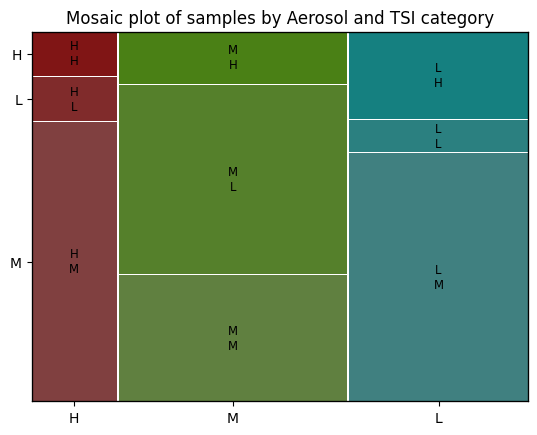

In [ ]:
from statsmodels.graphics.mosaicplot import mosaic

#labeller = lambda k: 
#_ = mosaic(dataset_clean_encoded, ['TSI'], title='Mosaic plot of samples by Aerosol category')
#_ = mosaic(dataset_clean_encoded, ['Aerosols'], title='Mosaic plot of samples by Aerosol category')

cats = ['H','M','L']

labels = {(cats[i],cat_rows[i]):() for i in range(len(cats))}


plot = mosaic(dataset_clean_encoded, ['Aerosols','TSI'], title='Mosaic plot of samples by Aerosol and TSI category')


**c.** Perform bi-variate analysis on the variables. You do not need to present the analysis of every pair of variables; only focus on the pairs you believe are worth investigating and explain. For each pair, describe the relationship between the two variables. Use appropriate statistical methods and/or visualizations.

**Response.** 

Bi-variate analysis focussing on categorical variables

In [ ]:
pd.crosstab(dataset_clean_encoded.TSI, dataset_clean_encoded.Aerosols)

Aerosols,H,L,M
TSI,,,
H,6,25,19
L,6,9,69
M,38,71,46


get continuous date-time variable

In [ ]:
dataset_clean_encoded['continuous_months'] = dataset_clean_encoded['Year'] * 12 + dataset_clean_encoded['Month']
dataset_clean_encoded.dtypes

Year                   int64
Month                float64
MEI                  float64
CO2                  float64
CH4                  float64
N2O                   object
CFC-11               float64
CFC-12               float64
TSI                   object
Aerosols              object
Temp                 float64
TSI_H                   bool
TSI_L                   bool
TSI_M                   bool
N2O_H                   bool
N2O_L                   bool
Aerosols_H              bool
Aerosols_L              bool
Aerosols_M              bool
continuous_months    float64
dtype: object

Plotting plainly by category

['CH4', 'CO2', 'Temp', 'MEI', 'CFC-11', 'CFC-12', 'continuous_months']


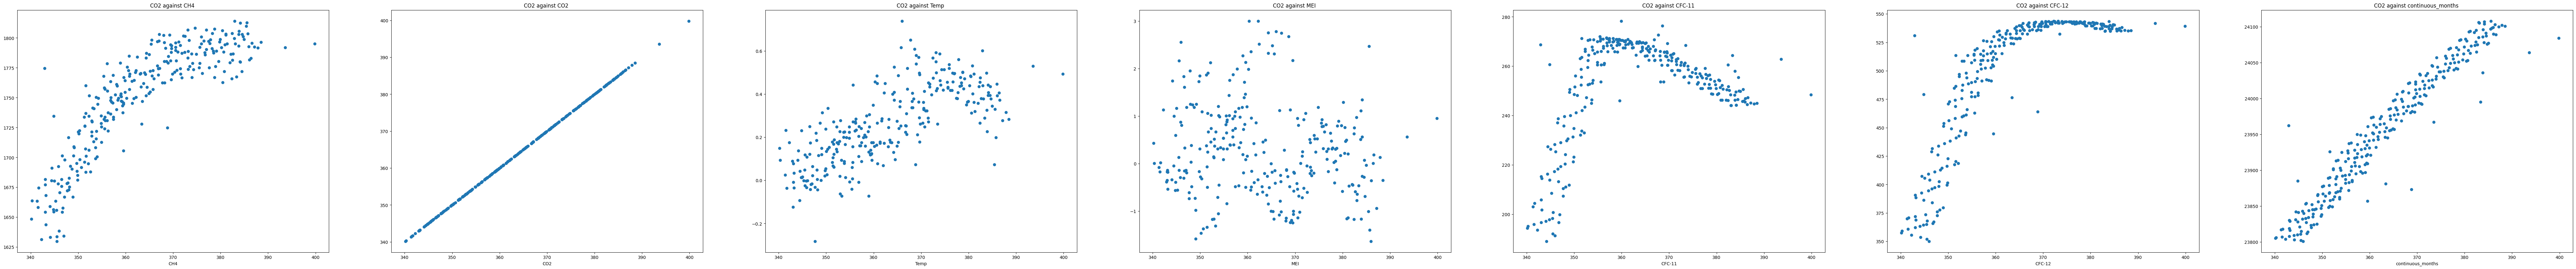

In [ ]:
SCALE_FACTOR = 15

num_float64_columns = dataset_clean_encoded.select_dtypes(include=['float64']).shape[1]
cols = list(dataset_clean_encoded.select_dtypes(include=['float64']))
#CHANGE HERE
excluded_cols = {'Month'}

plottable_columns = list(set(cols) - excluded_cols)
print(plottable_columns)
#fig, axes = plt.subplots(num_float64_columns,1, sharex=True, sharey=True, layout="constrained")
fig_to_save, axes = plt.subplots(1,len(plottable_columns),figsize = (len(plottable_columns) * SCALE_FACTOR,10))
#plt.figure(figsize=(200, 250))

for cont_var in range(len(plottable_columns)):
    column_name = plottable_columns[cont_var]
    if column_name not in excluded_cols:
        sample_axes = axes[cont_var]
        
        sample_axes.scatter(dataset_clean_encoded['CO2'],\
                            dataset_clean_encoded[column_name])
        
        sample_axes.set_title(f"CO2 against {column_name} ")
        sample_axes.set_xlabel("CO2")
        sample_axes.set_xlabel(column_name)

USER = "Larry"
plt.savefig(f"graphs/{USER}_CO2_qn_3_scatterplot_base.png")
plt.show()

In [ ]:
# Larry's code
cat_dict = {'Aerosols':['L','M','H'],
            'TSI':['L','M','H'],
            'N2O':['L','H']}

SCALE_FACTOR = 15

num_float64_columns = dataset.select_dtypes(include=['float64']).shape[1]
cols = list(dataset.select_dtypes(include=['float64']))
#CHANGE HERE
excluded_cols = {'Month'}

plottable_columns = list(set(cols) - excluded_cols)
#fig, axes = plt.subplots(num_float64_columns,1, sharex=True, sharey=True, layout="constrained")
fig_to_save, axes = plt.subplots(len(cat_dict.keys()),len(plottable_columns),figsize = (len(plottable_columns) * 10))
#plt.figure(figsize=(200, 250))

cat_num = 0

for cat_name in cat_dict.keys():
    cat_vals = cat_dict[cat_name]
    
    for cont_var in range(len(plottable_columns)):
        column_name = plottable_columns[cont_var]
        if column_name not in excluded_cols:
            sample_axes = axes[cat_num,cont_var]
            
            for cat in cat_vals:
                sample_axes.scatter(dataset_clean_encoded[dataset_clean_encoded[cat_name]==cat]['CO2'],\
                                    dataset_clean_encoded[dataset_clean_encoded[cat_name]==cat][column_name])
            
            sample_axes.set_title(f"{column_name} against CO2, grouping by {cat}")
            sample_axes.legend(cat_vals)
    cat_num += 1
    

USER = "Larry"
plt.savefig(f"graphs/{USER}_CO2_qn_3_scatterplot_cat_sep.png")
plt.show()

TypeError: Value after * must be an iterable, not int

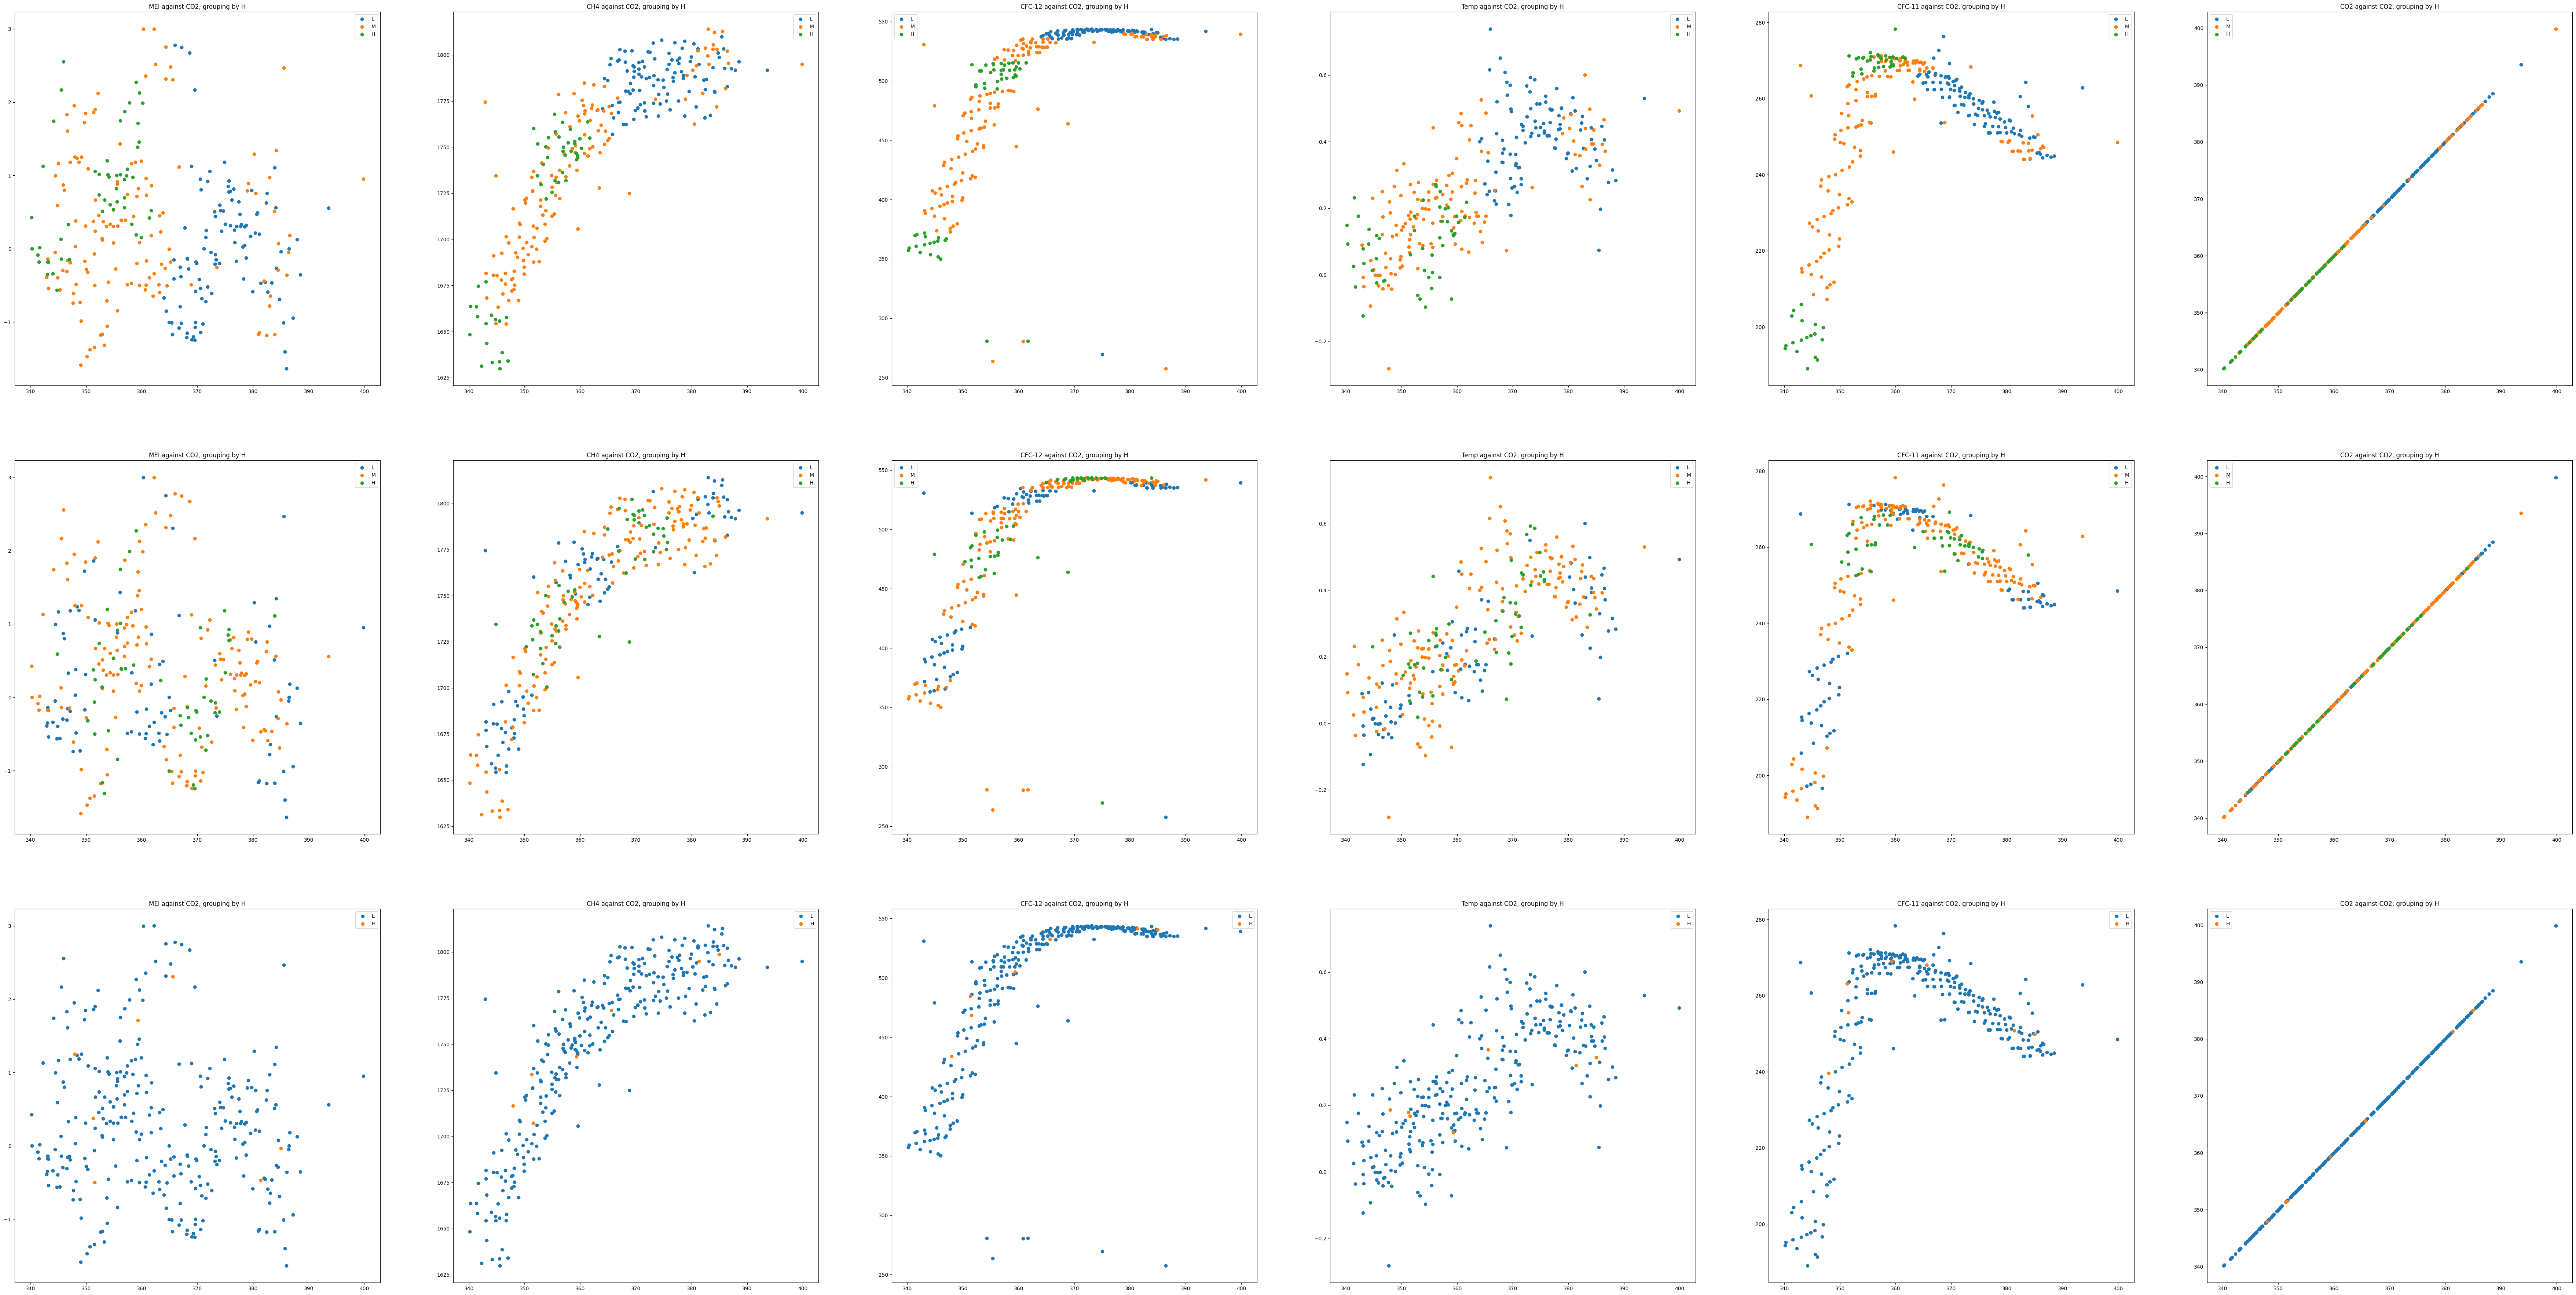

In [ ]:
# dylan's code

cat_dict = {'Aerosols':['L','M','H'],
            'TSI':['L','M','H'],
            'N2O':['L','H']}

SCALE_FACTOR = 15

num_float64_columns = dataset.select_dtypes(include=['float64']).shape[1]
cols = list(dataset.select_dtypes(include=['float64']))
#CHANGE HERE
excluded_cols = {'Month'}

plottable_columns = list(set(cols) - excluded_cols)
#fig, axes = plt.subplots(num_float64_columns,1, sharex=True, sharey=True, layout="constrained")
fig_to_save, axes = plt.subplots(len(cat_dict.keys()),len(plottable_columns),figsize = (len(plottable_columns) * SCALE_FACTOR,len(cat_dict.keys())*SCALE_FACTOR))
#plt.figure(figsize=(200, 250))

cat_num = 0

for cat_name in cat_dict.keys():
    cat_vals = cat_dict[cat_name]
    
    for cont_var in range(len(plottable_columns)):
        column_name = plottable_columns[cont_var]
        if column_name not in excluded_cols:
            sample_axes = axes[cat_num,cont_var]
            
            for cat in cat_vals:
                sample_axes.scatter(dataset_clean_encoded[dataset_clean_encoded[cat_name]==cat]['CO2'],\
                                    dataset_clean_encoded[dataset_clean_encoded[cat_name]==cat][column_name])
            
            sample_axes.set_title(f"{column_name} against CO2, grouping by {cat}")
            sample_axes.legend(cat_vals)
    cat_num += 1
    
plt.show()

get r-val for all values

In [ ]:
datatset_correlations = dataset_clean_encoded[plottable_columns].corr()
# table of correlation coefficients 
print(datatset_correlations)


max_corr = lambda x : x[abs(x) != 1].max()
datatset_correlation_max = datatset_correlations.agg(max_corr)
datatset_correlation_max





             MEI       CH4    CFC-12      Temp    CFC-11       CO2
MEI     1.000000 -0.098531 -0.041589  0.127758  0.075139 -0.131101
CH4    -0.098531  1.000000  0.816492  0.694808  0.703821  0.855551
CFC-12 -0.041589  0.816492  1.000000  0.605383  0.688358  0.684076
Temp    0.127758  0.694808  0.605383  1.000000  0.374428  0.731156
CFC-11  0.075139  0.703821  0.688358  0.374428  1.000000  0.388000
CO2    -0.131101  0.855551  0.684076  0.731156  0.388000  1.000000


MEI       0.127758
CH4       0.855551
CFC-12    0.816492
Temp      0.731156
CFC-11    0.703821
CO2       0.855551
dtype: float64

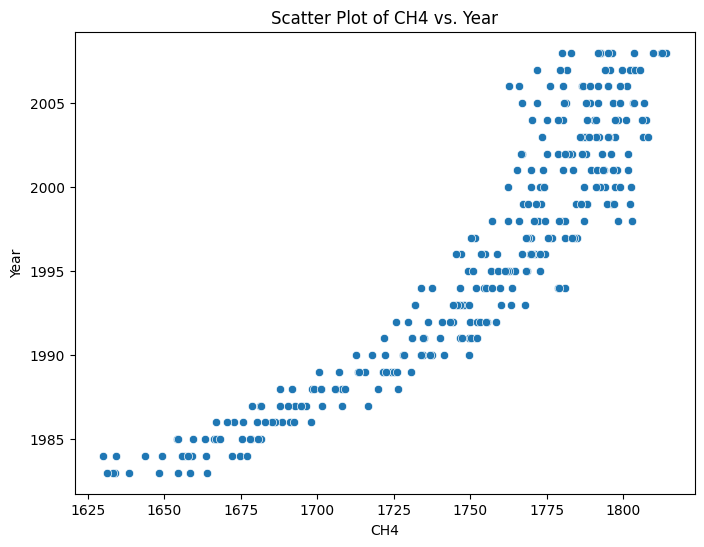

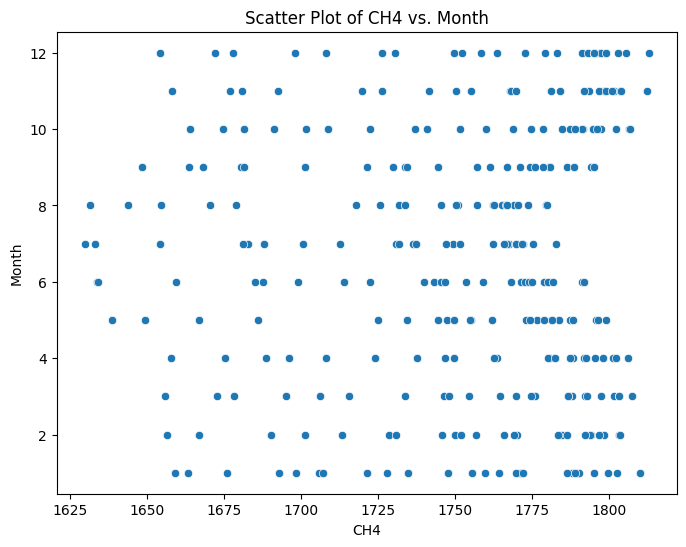

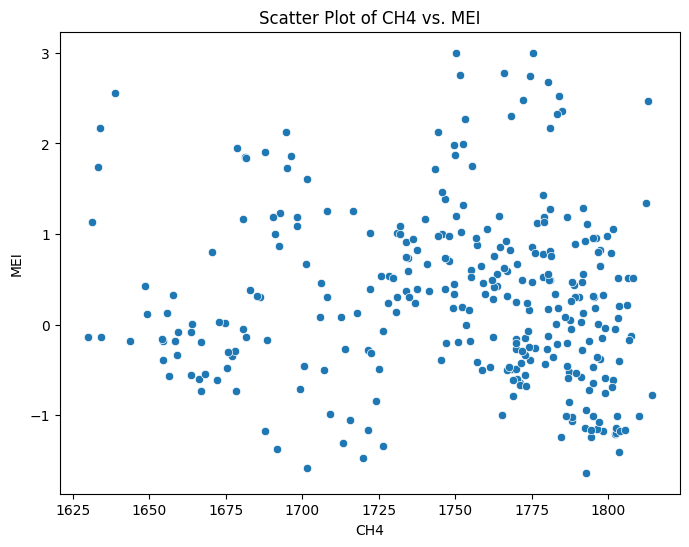

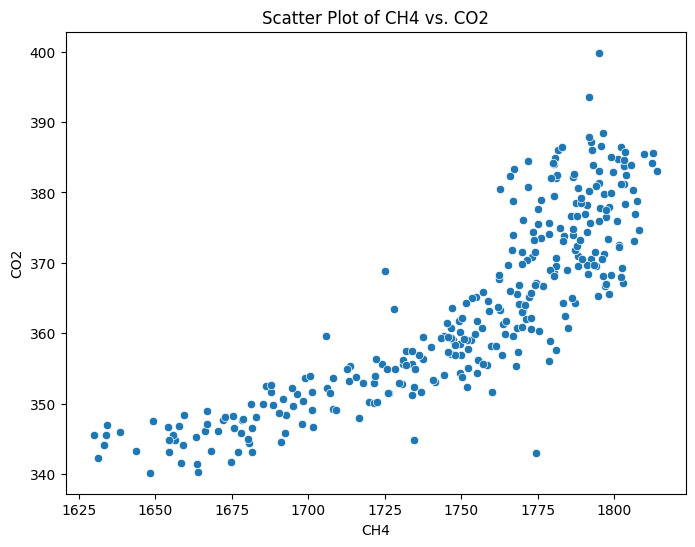

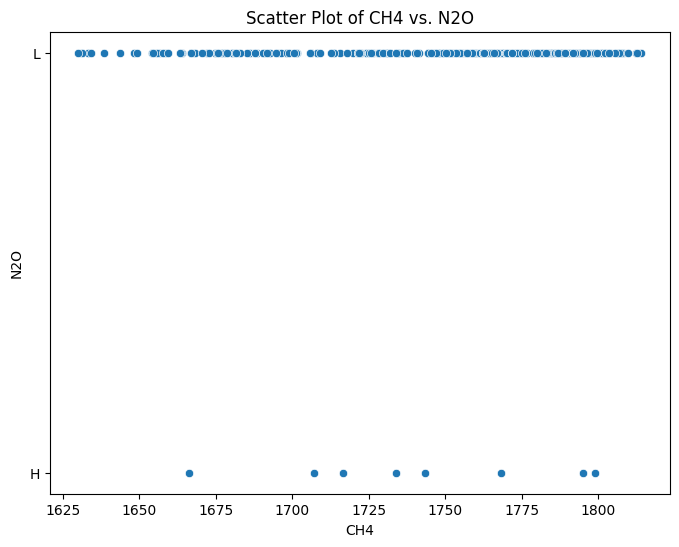

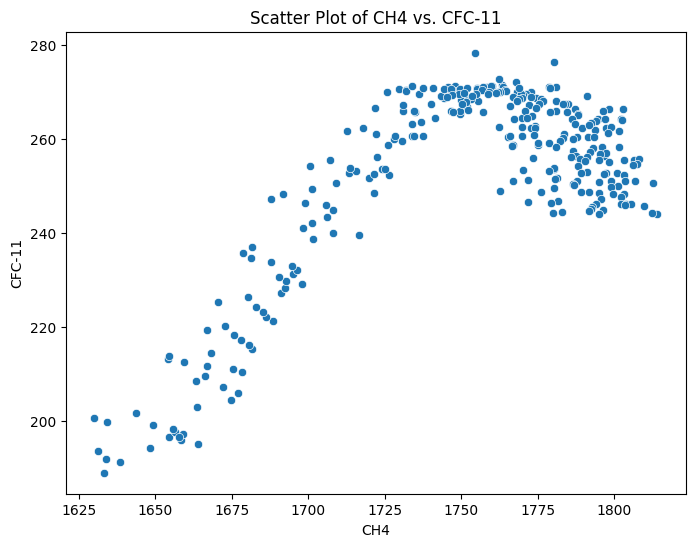

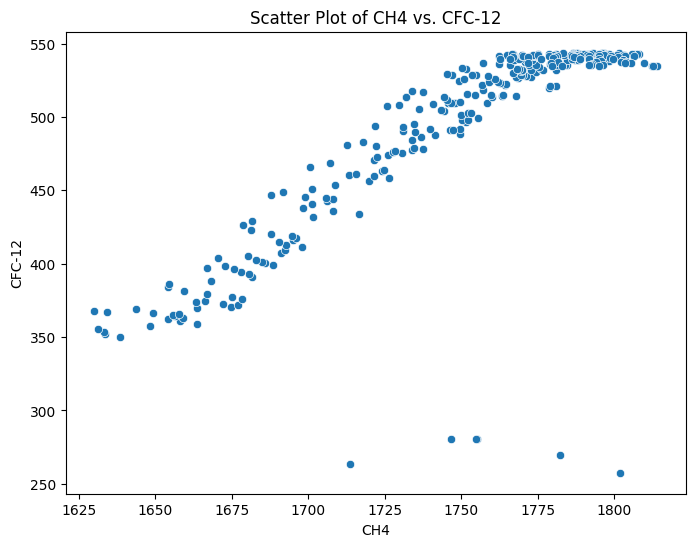

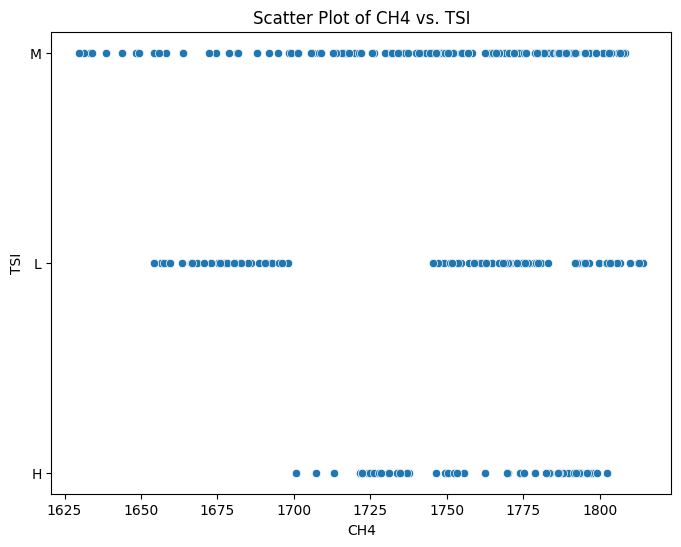

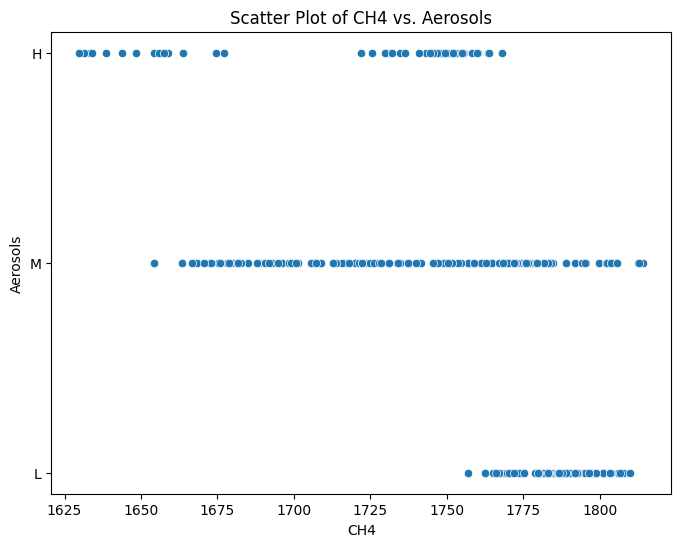

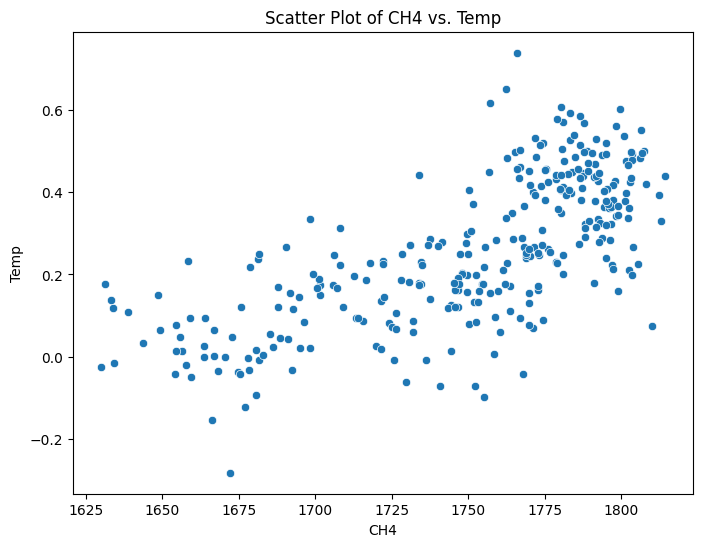

In [ ]:
#Brendan's Code
for column in dataset_clean_encoded.columns:
    if column != 'CH4':
        plt.figure(figsize=(8, 6))  # Optional: Adjust figure size
        sns.scatterplot(x=dataset_clean_encoded['CH4'], y=dataset_clean_encoded[column])
        plt.title(f'Scatter Plot of CH4 vs. {column}')  # Optional: Add a title
        plt.xlabel('CH4')  # Optional: Set X-axis label
        plt.ylabel(column)  # Optional: Set Y-axis label
        plt.show()

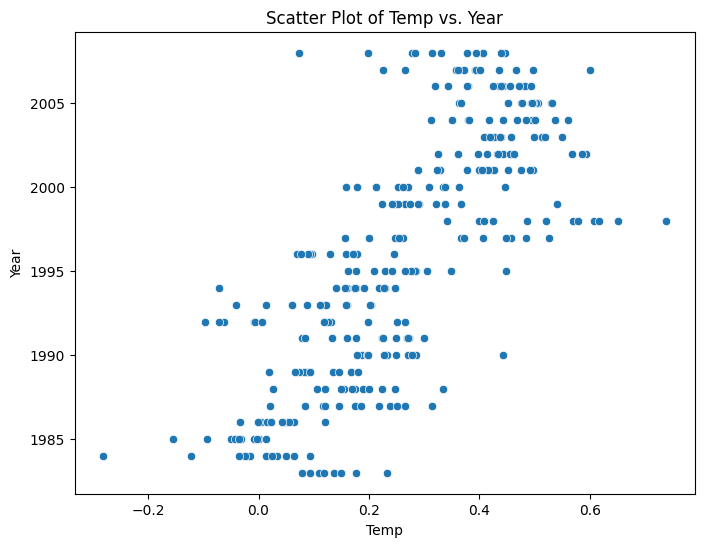

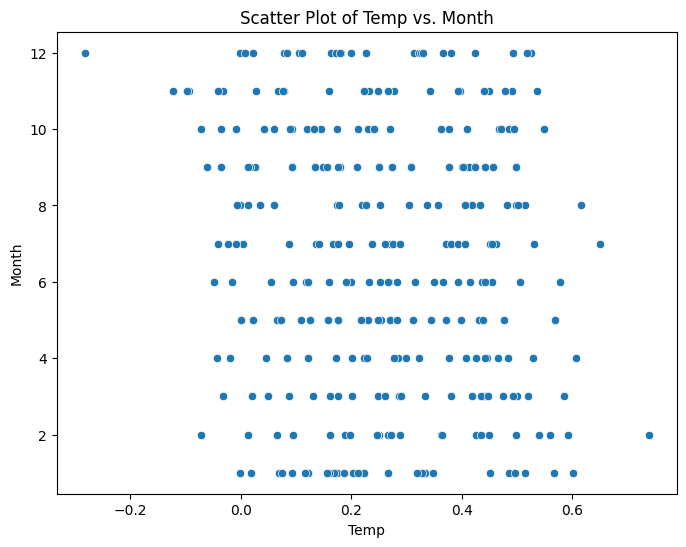

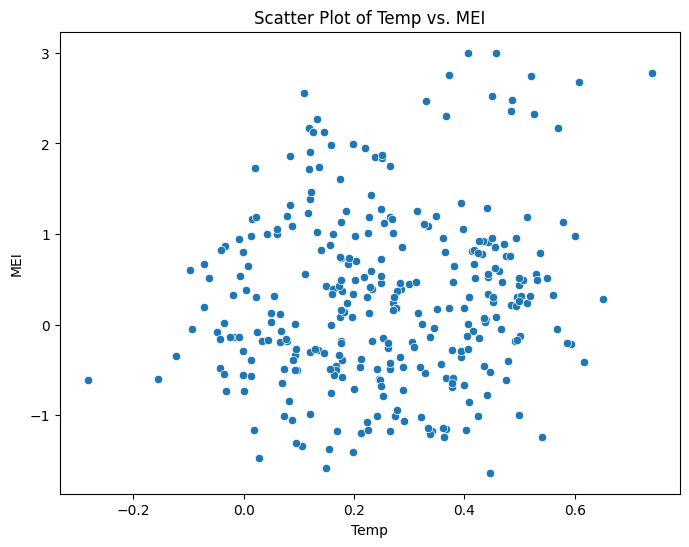

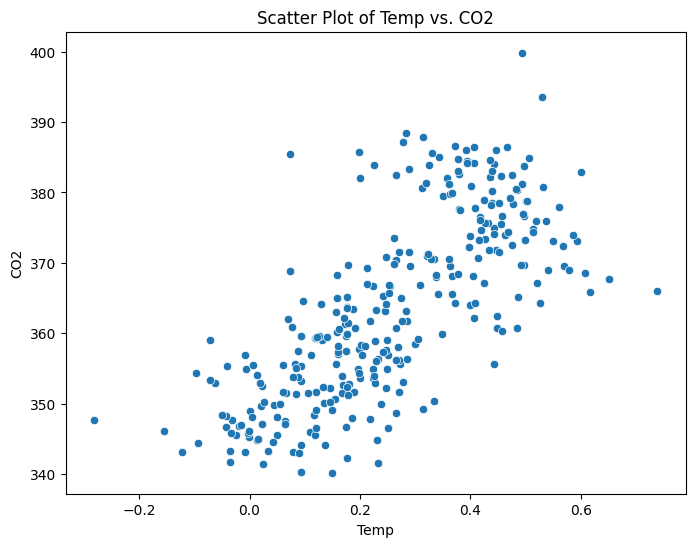

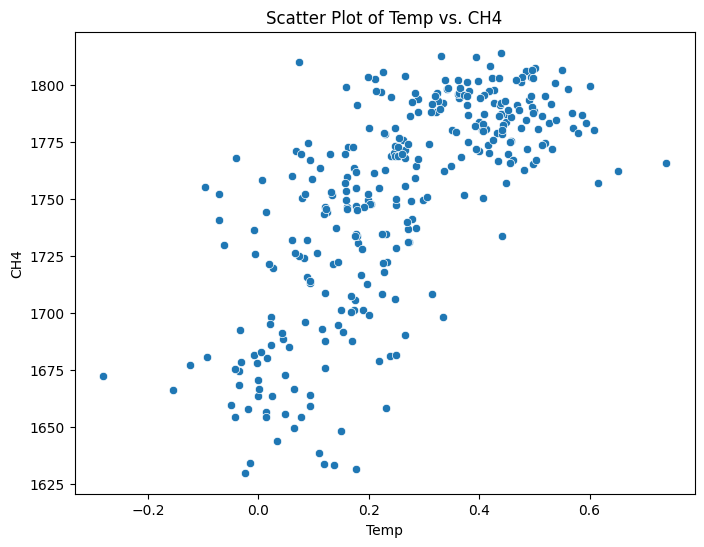

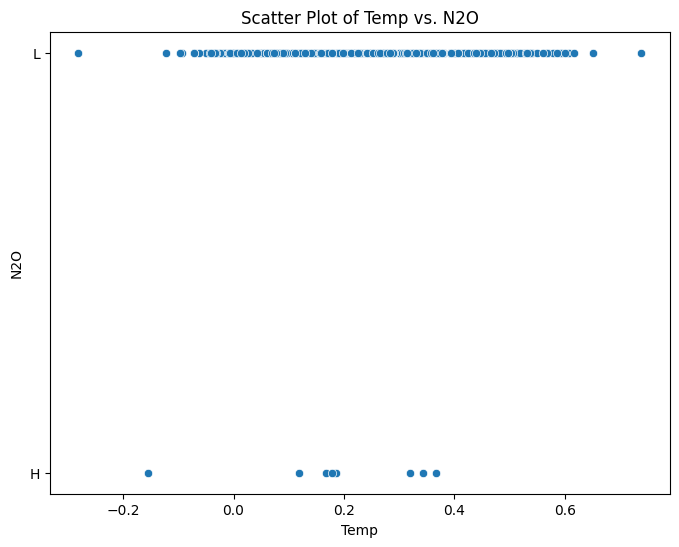

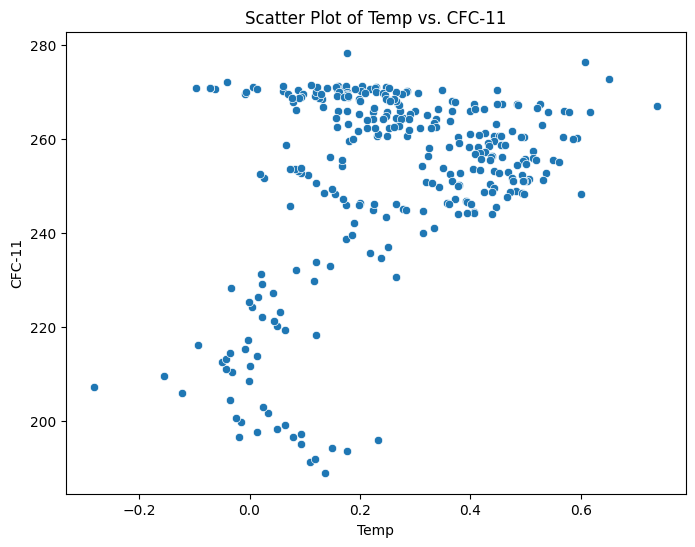

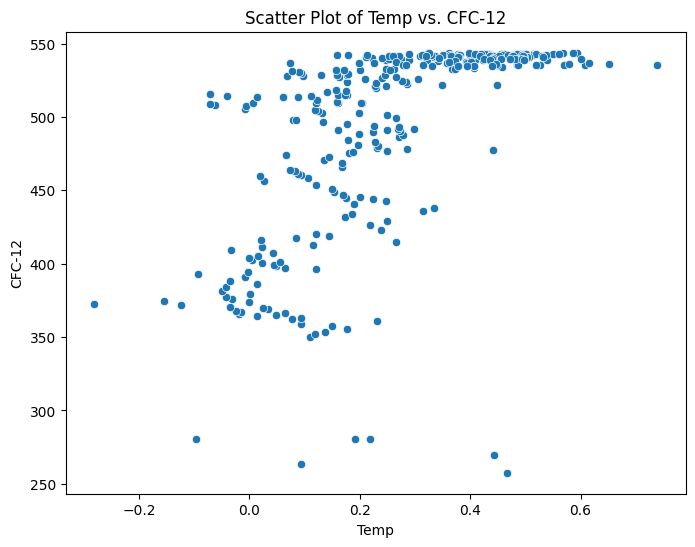

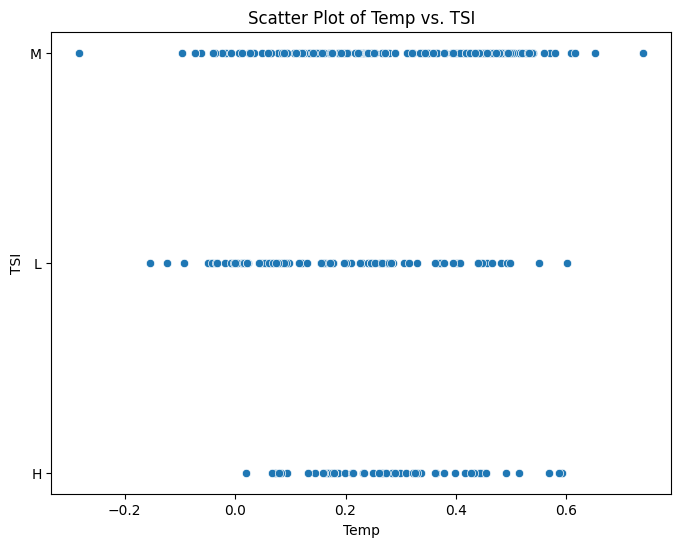

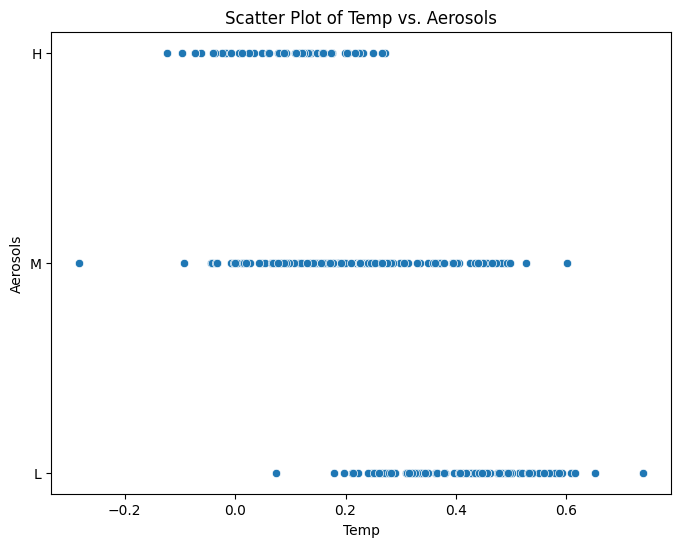

In [ ]:
#Brendan's Code
for column in dataset_clean_encoded.columns:
    if column != 'Temp':
        plt.figure(figsize=(8, 6))  # Optional: Adjust figure size
        sns.scatterplot(x=dataset_clean_encoded['Temp'], y=dataset_clean_encoded[column])
        plt.title(f'Scatter Plot of Temp vs. {column}')  # Optional: Add a title
        plt.xlabel('Temp')  # Optional: Set X-axis label
        plt.ylabel(column)  # Optional: Set Y-axis label
        plt.show()

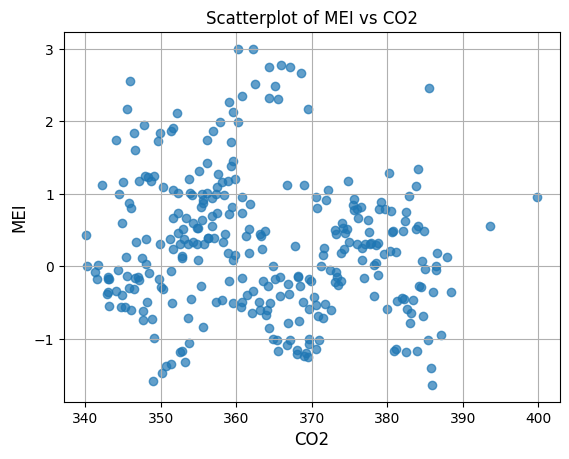

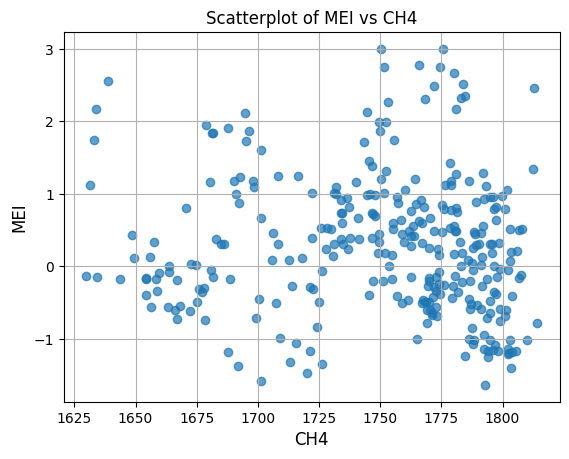

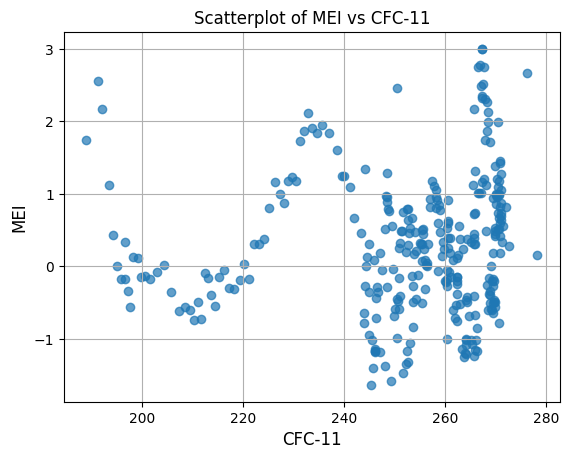

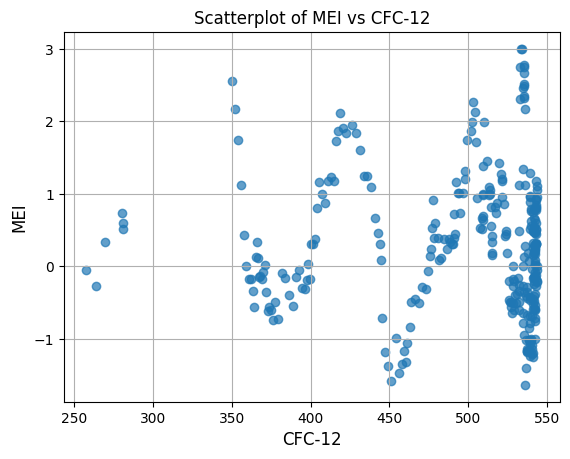

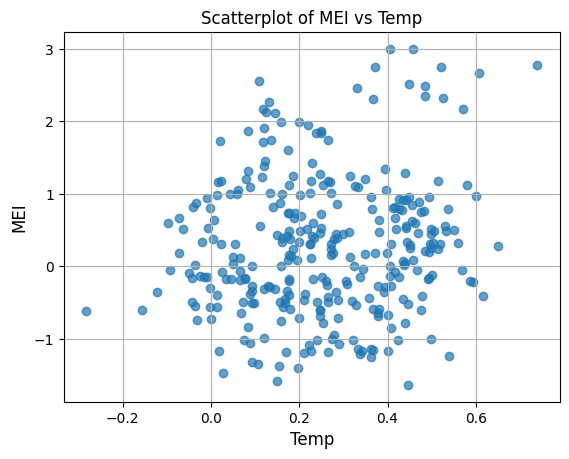

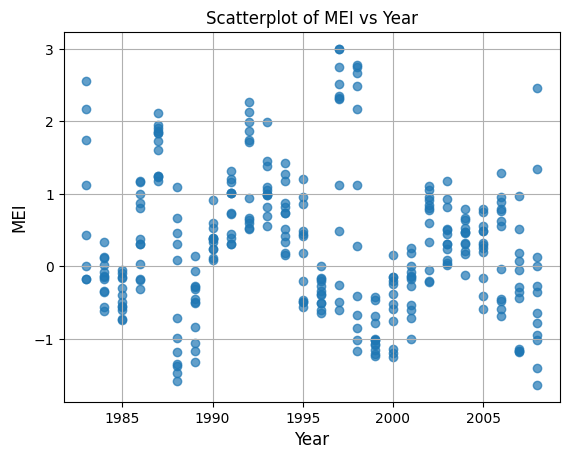

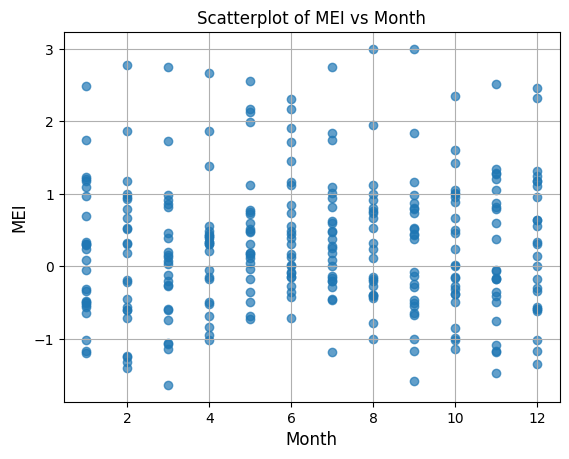

Correlation between MEI and other numerical variables:
Temp: 0.133
CO2: -0.124
Year: -0.123
CH4: -0.087
CFC-11: 0.084
CFC-12: -0.033
Month: 0.028

The variable most correlated with MEI is: Temp with correlation coefficient 0.133


In [ ]:
#wei bin's code
numerical_columns = ['CO2', 'CH4', 'CFC-11', 'CFC-12', 'Temp','Year','Month']

correlations = {}

for col in numerical_columns:
    #draw the scatterplots
    plt.figure()
    plt.scatter(dataset_clean_encoded[col], dataset_clean_encoded['MEI'], alpha=0.7)
    plt.title(f'Scatterplot of MEI vs {col}')
    plt.xlabel(col, fontsize=12)
    plt.ylabel('MEI', fontsize=12)
    plt.grid(True)
    plt.show()
    
    # calculate the correlations
    corr = dataset_clean_encoded['MEI'].corr(dataset_clean_encoded[col])
    correlations[col] = corr
    
# Display sorted correlations
sorted_correlations = dict(sorted(correlations.items(), key=lambda item: abs(item[1]), reverse=True))

print("Correlation between MEI and other numerical variables:")
for var, corr in sorted_correlations.items():
    print(f"{var}: {corr:.3f}")
    
    
# find the variable with highest correlation
most_correlated_variable = max(correlations, key=lambda x: abs(correlations[x]))
print(f"\nThe variable most correlated with MEI is: {most_correlated_variable} with correlation coefficient {correlations[most_correlated_variable]:.3f}")

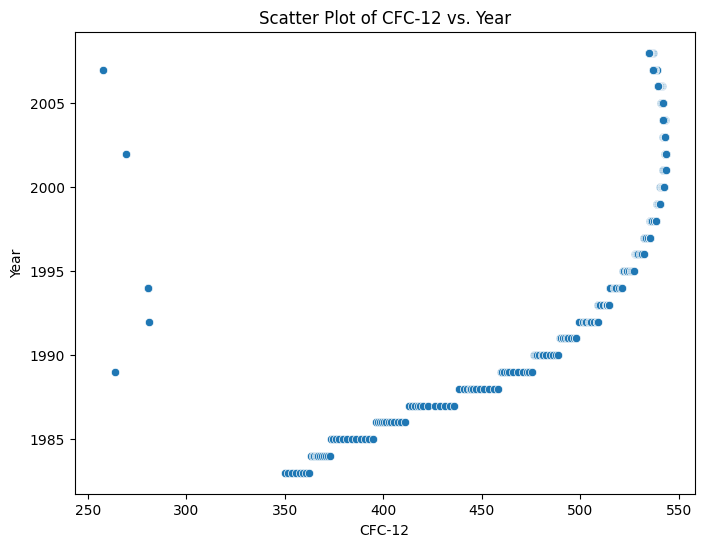

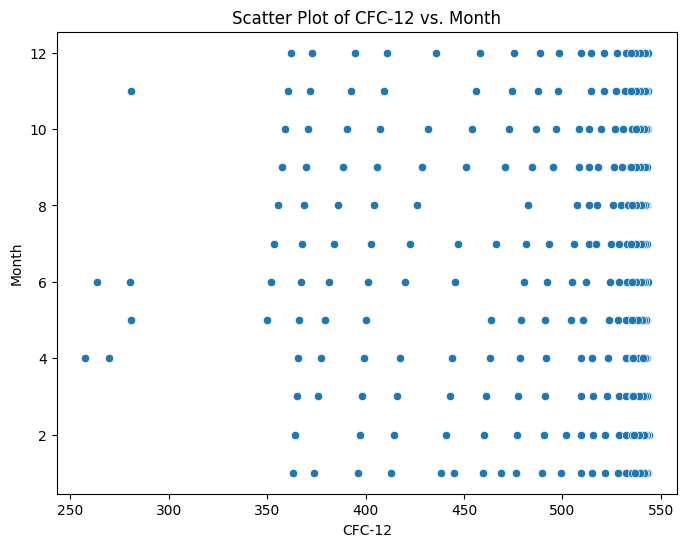

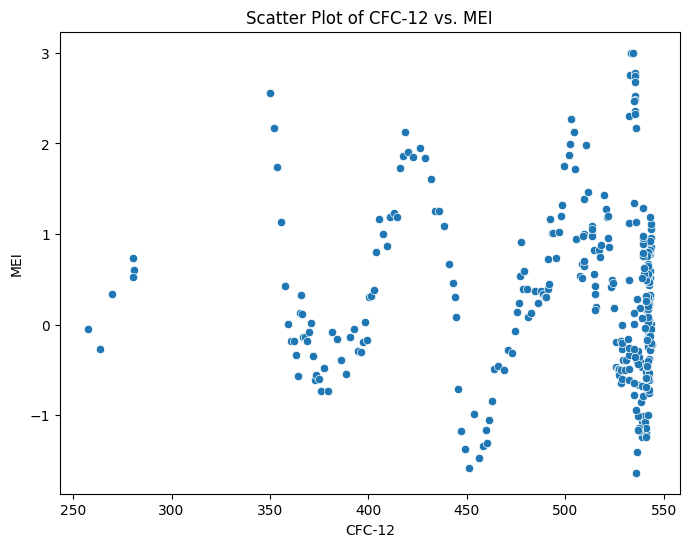

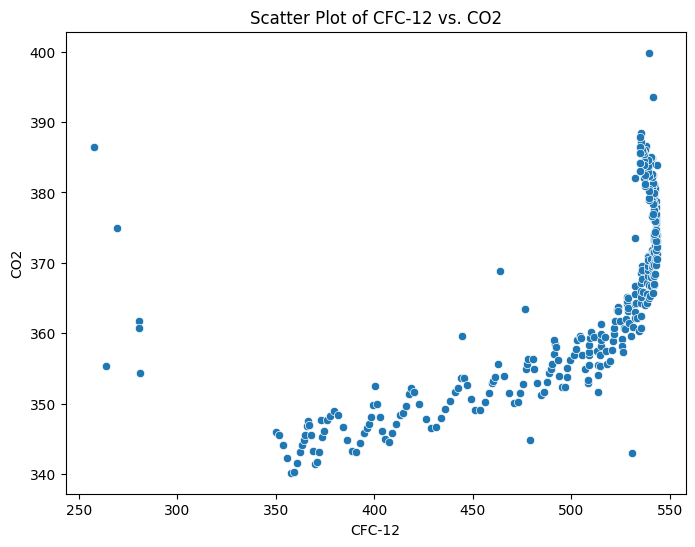

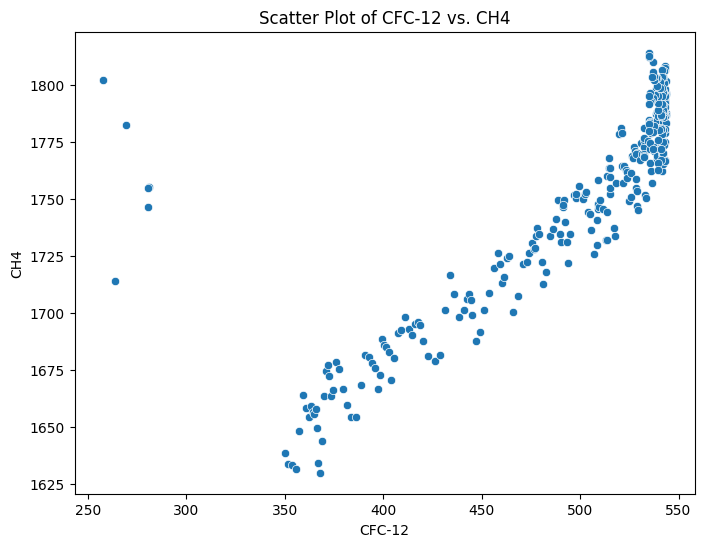

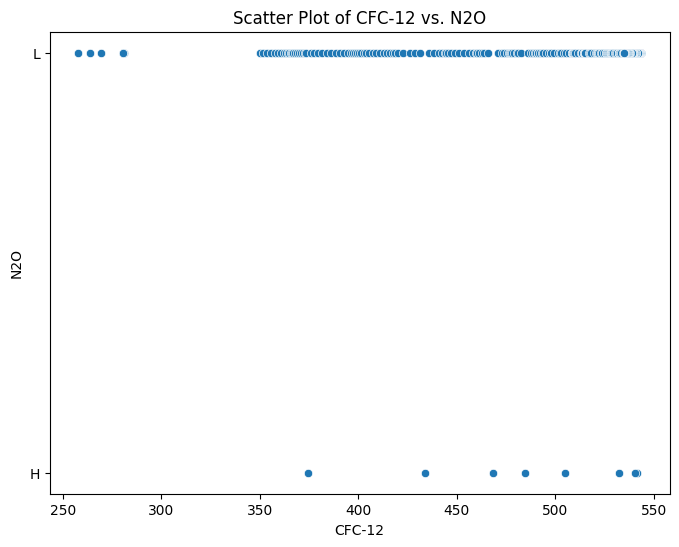

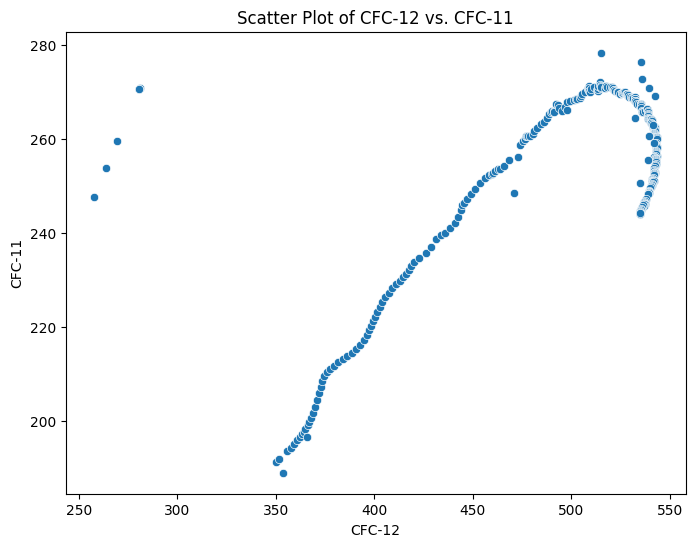

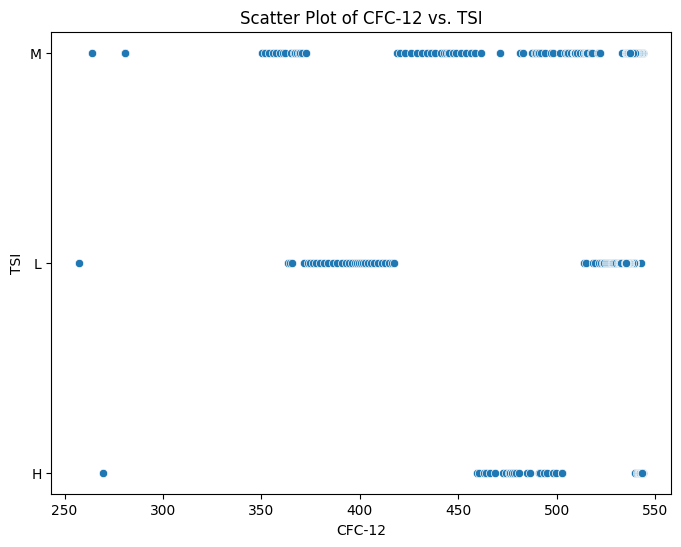

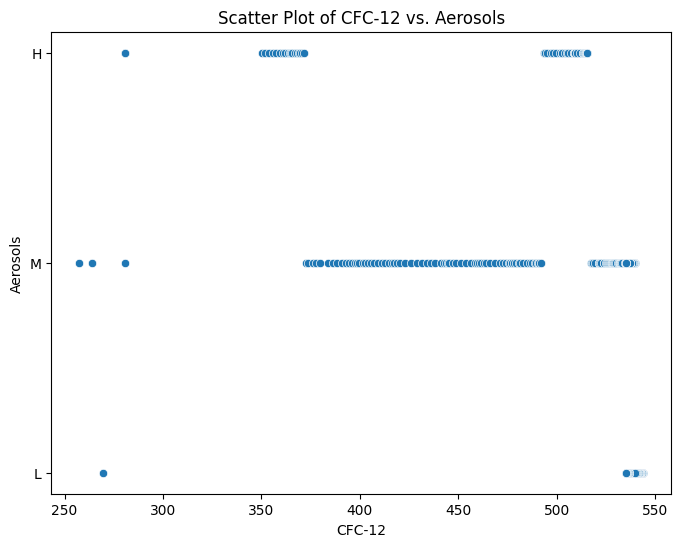

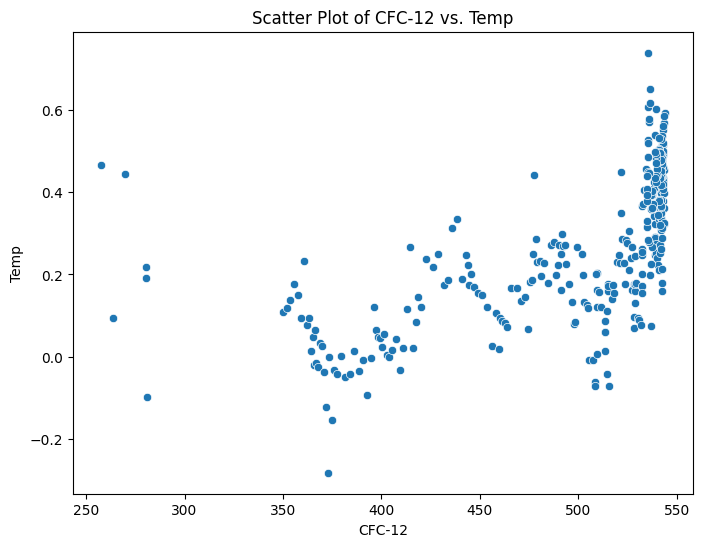

In [ ]:
#Brendan's Code
for column in dataset_clean_encoded.columns:
    if column != 'CFC-12':
        plt.figure(figsize=(8, 6))  # Optional: Adjust figure size
        sns.scatterplot(x=dataset_clean_encoded['CFC-12'], y=dataset_clean_encoded[column])
        plt.title(f'Scatter Plot of CFC-12 vs. {column}')  # Optional: Add a title
        plt.xlabel('CFC-12')  # Optional: Set X-axis label
        plt.ylabel(column)  # Optional: Set Y-axis label
        plt.show()

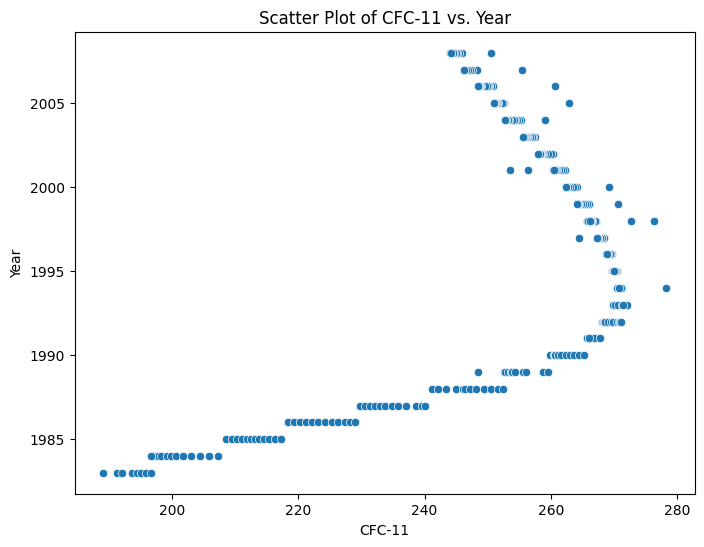

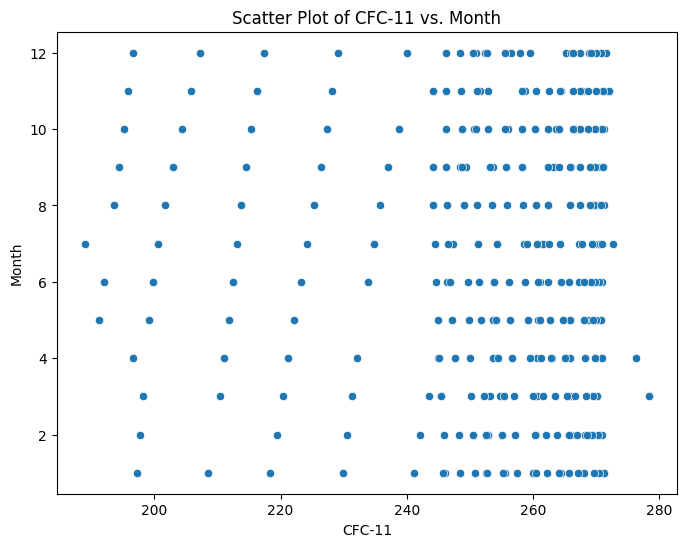

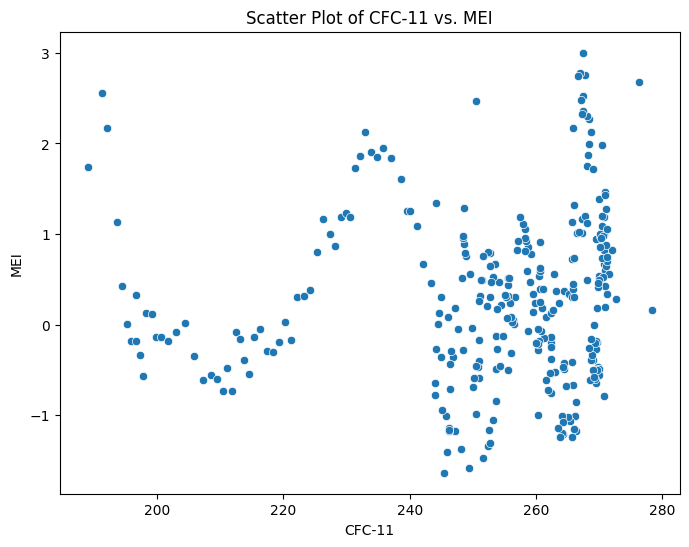

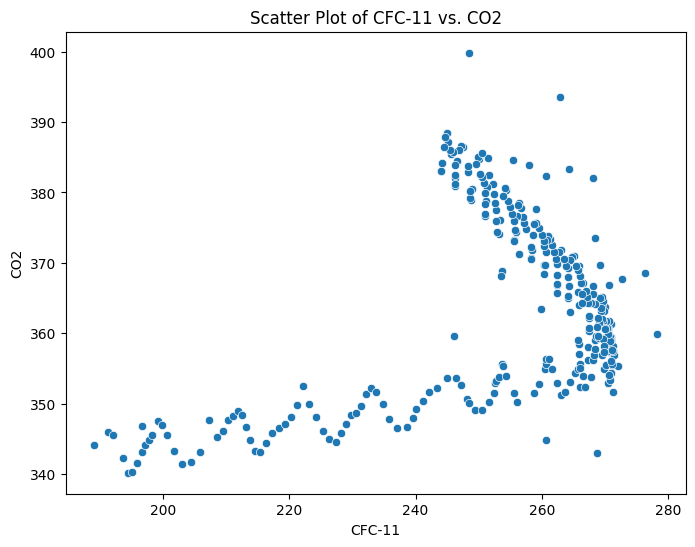

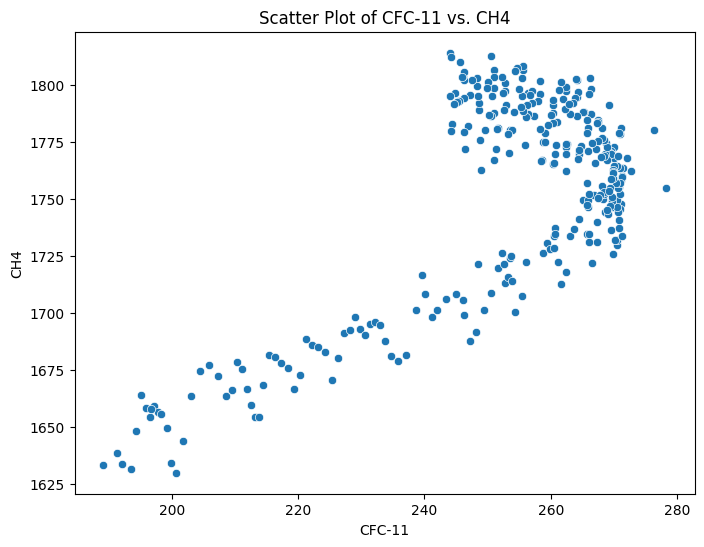

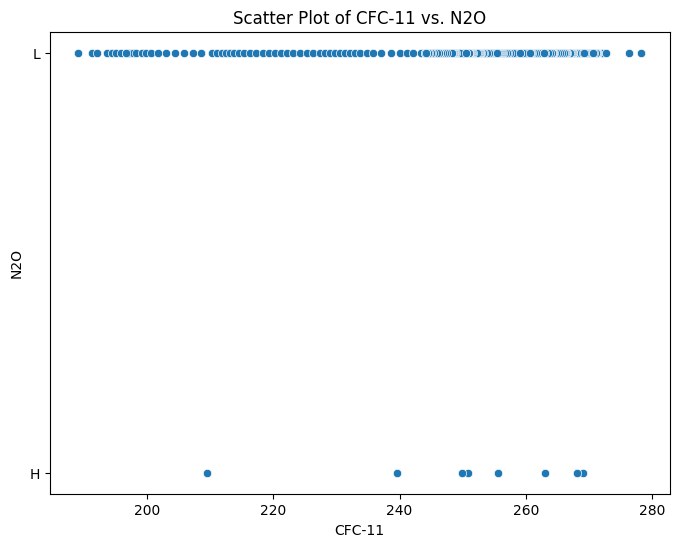

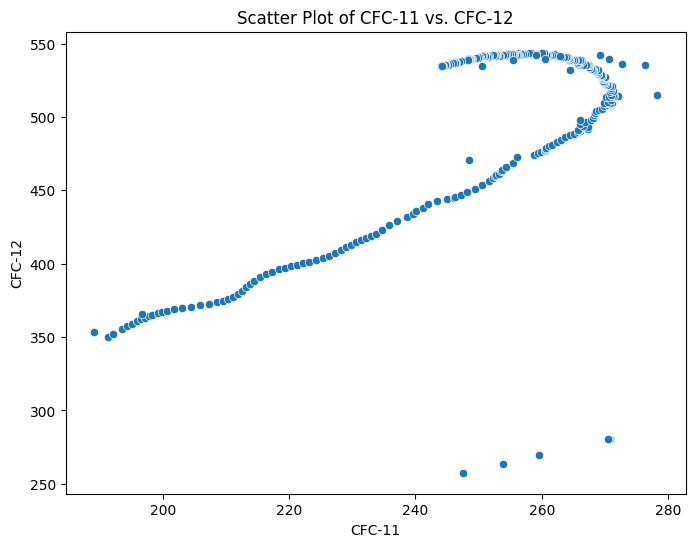

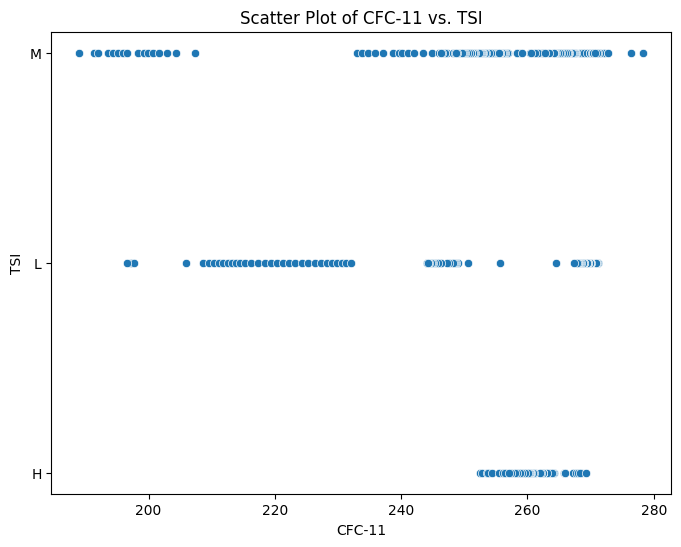

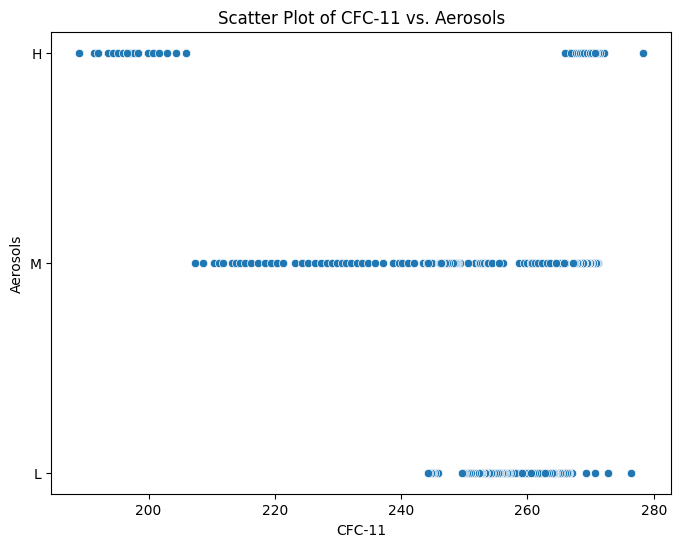

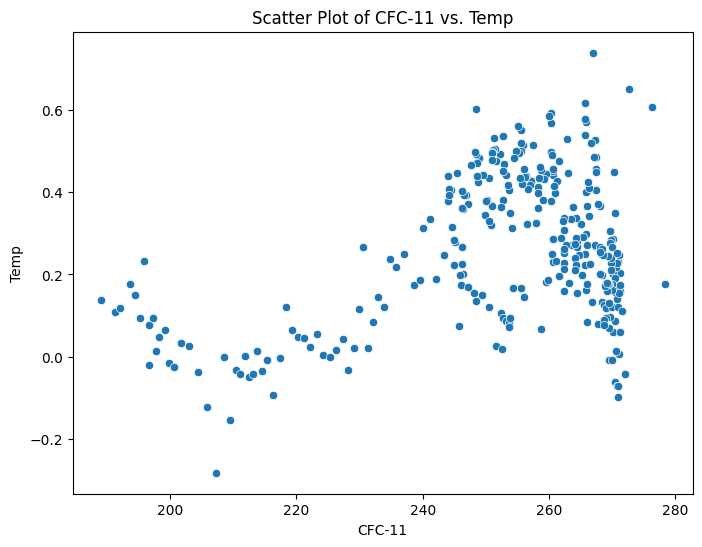

In [ ]:
#Brendan's Code
for column in dataset_clean_encoded.columns:
    if column != 'CFC-11':
        plt.figure(figsize=(8, 6))  # Optional: Adjust figure size
        sns.scatterplot(x=dataset_clean_encoded['CFC-11'], y=dataset_clean_encoded[column])
        plt.title(f'Scatter Plot of CFC-11 vs. {column}')  # Optional: Add a title
        plt.xlabel('CFC-11')  # Optional: Set X-axis label
        plt.ylabel(column)  # Optional: Set Y-axis label
        plt.show()

In [ ]:
!pip install seaborn

   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.9 kB ? eta -:--:--
   ---- ---------------------------------- 30.7/294.9 kB 660.6 kB/s eta 0:00:01
   ---------------------------------- ----- 256.0/294.9 kB 2.6 MB/s eta 0:00:01
   ---------------------------------------- 294.9/294.9 kB 2.3 MB/s eta 0:00:00


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

for column in dataset.columns:
    if column != 'CFC-11':
        correlation = dataset['CFC-11'].corr(dataset[column])  # Calculate correlation coefficient
        
        plt.figure(figsize=(8, 6))  # Optional: Adjust figure size
        sns.scatterplot(x=dataset['CFC-11'], y=dataset[column])
        
        # Update title to include correlation coefficient
        plt.title(f'Scatter Plot of CFC-11 vs. {column}\nCorrelation: {correlation:.2f}')
        
        plt.xlabel('CFC-11')  # Optional: Set X-axis Label
        plt.ylabel(column)  # Optional: Set Y-axis Label
        plt.show()

NameError: name 'dataset' is not defined

In [ ]:
# Strong Correlation (threshold value: abs(corr) >= 0.6)

In [ ]:
# Weak correlation